# Census Income

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])

No of Rows: 32560
No of Columns: 15


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Exploratory Data Analysis

In [7]:
df.isin([' ','NA','-']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [8]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

In [9]:
df=df.replace(' ?',np.nan)

df.duplicated().sum()

24

In [10]:
df= df.drop_duplicates()

# Checking Nulls

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     582
Income               0
dtype: int64

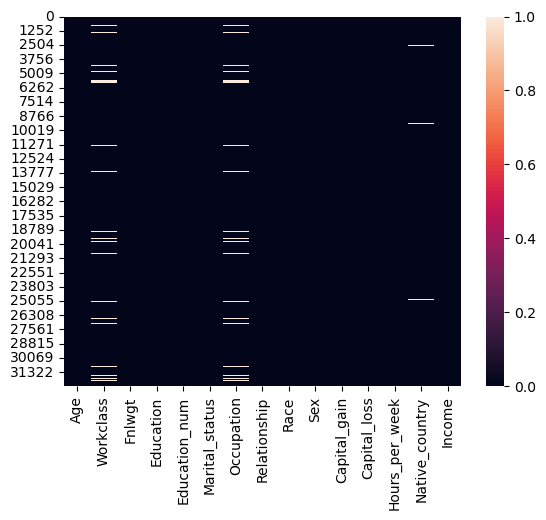

In [11]:
sns.heatmap(df.isna())
df.isna().sum()

# Removing Nulls

In [12]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)
df.isna().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [13]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 9


In [14]:
print("Categorical variables:",list(obj[obj].index))

Categorical variables: ['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']


In [15]:
categories=['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
for i in categories:
    print(i)
    print(df[i].value_counts())
    print('='*100)

Workclass
 Private             24509
 Self-emp-not-inc     2540
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
Education
 HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           332
 1st-4th           166
 Preschool          50
Name: Education, dtype: int64
Marital_status
 Married-civ-spouse       14970
 Never-married            10666
 Divorced                  4441
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64
Occupation
 Prof-specialty       5979
 Craft-repair         40

# Univariate Analysis

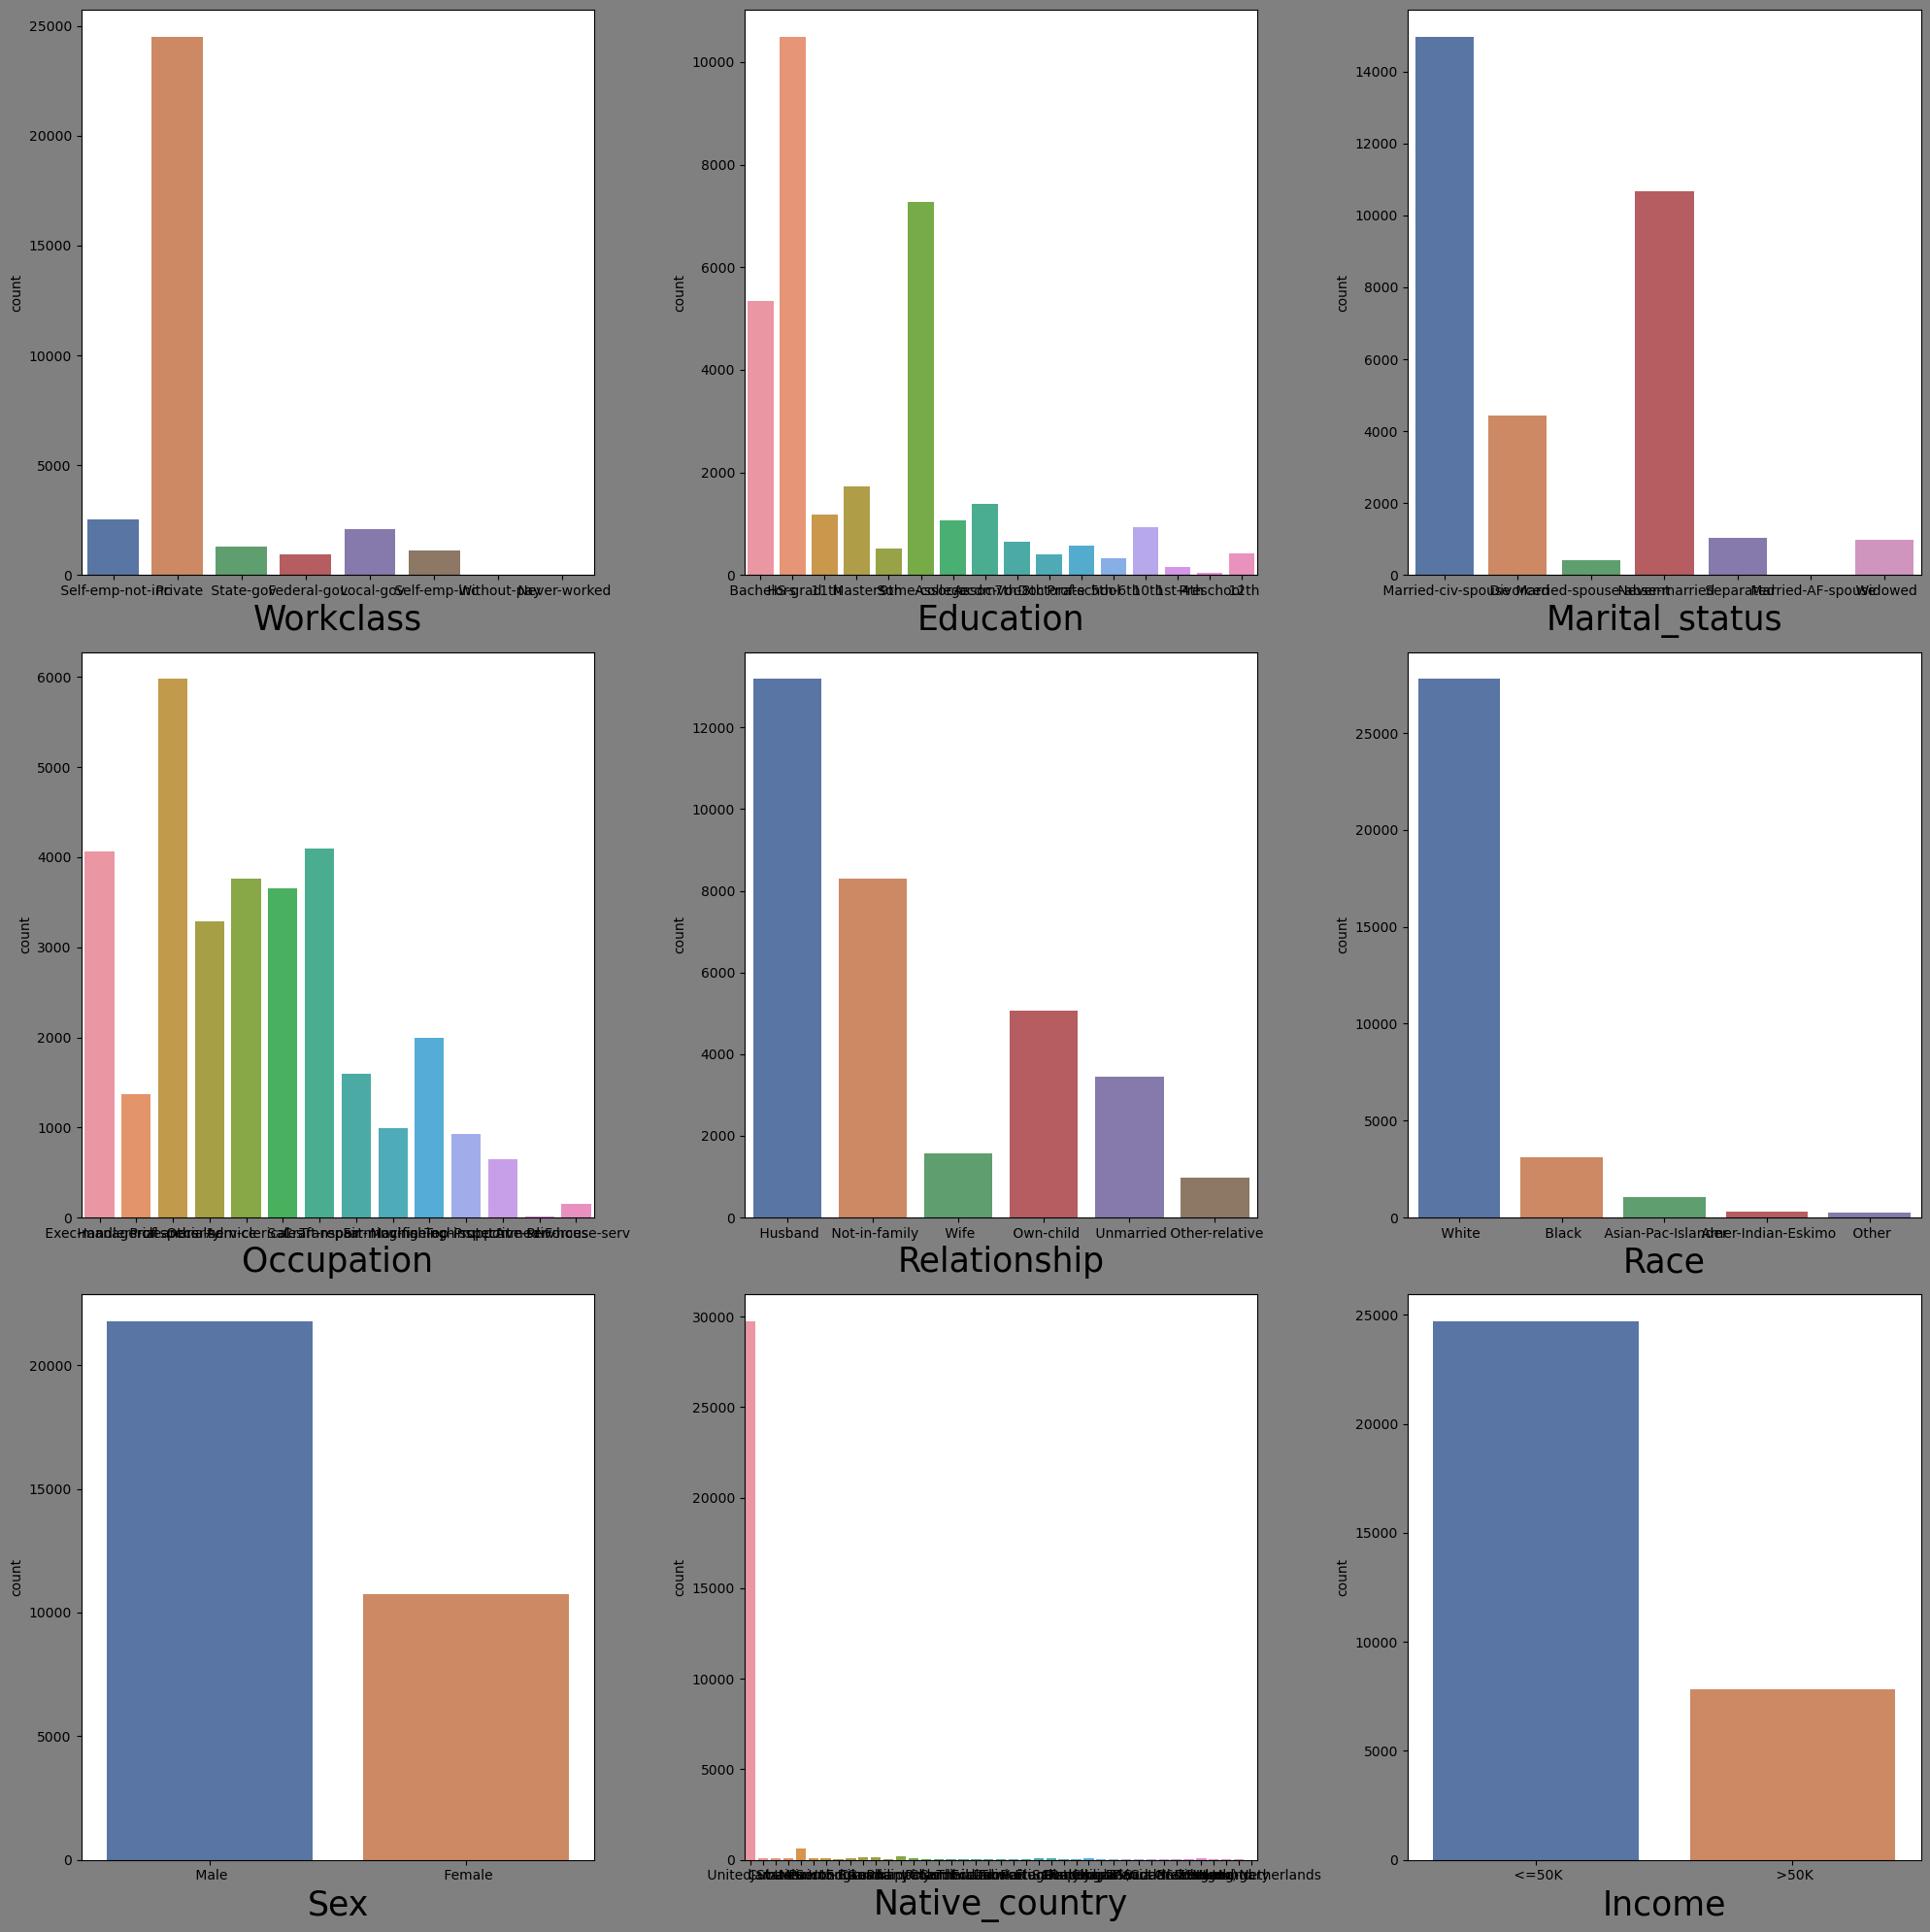

In [16]:
sns.set_palette('deep')
plt.figure(figsize=(20,20), facecolor='grey')

for i, category in enumerate(categories, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

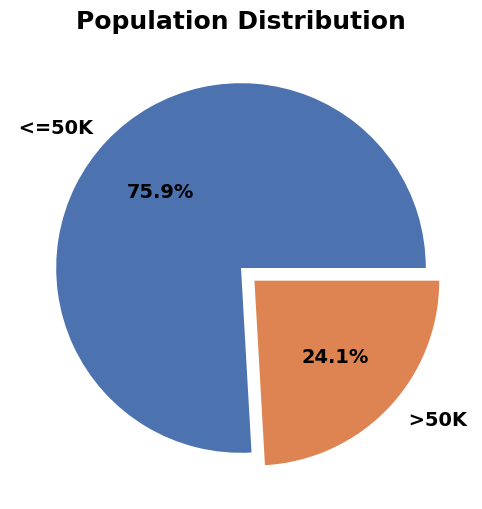

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# Set pie plot parameters
plt.rcParams["figure.autolayout"] = True
sns.set_palette('deep')

# Plot pie chart
df['Income'].value_counts().plot.pie(explode=[0, 0.1], autopct='%3.1f%%',
                                     textprops={'fontweight': 'bold', 'fontsize': 14}, ax=ax)
ax.set_title('Population Distribution', fontsize=18, fontweight='bold')
ax.set_ylabel('')

plt.show()

Here 75.9 % population (24697 peoples) have income less than 50K.

# Bivariate Analysis

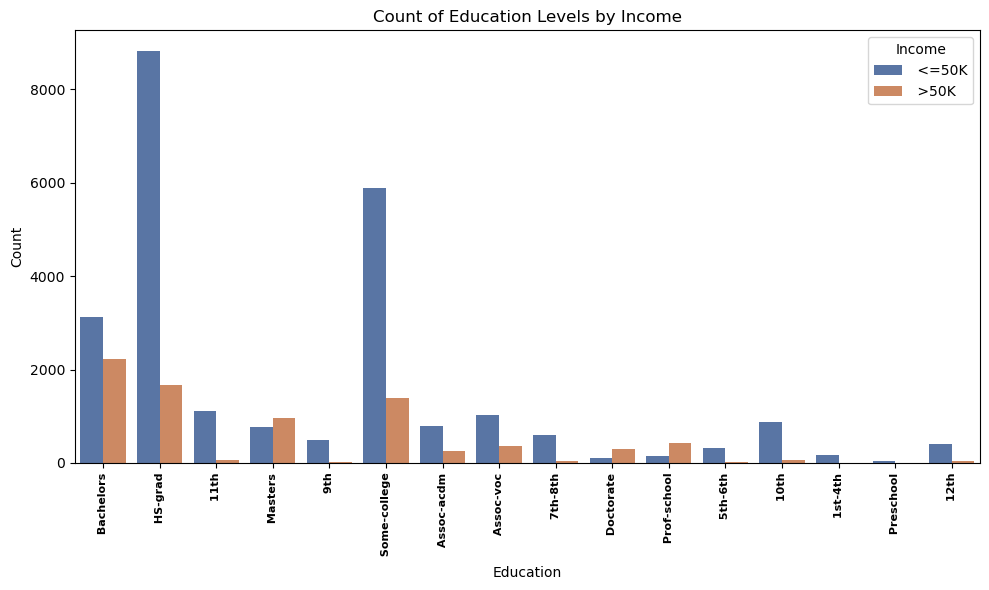

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Education', hue='Income', palette='deep')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Count of Education Levels by Income')
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
plt.show()

'Bachelor','HS-grad','some-college' is getting <=50K

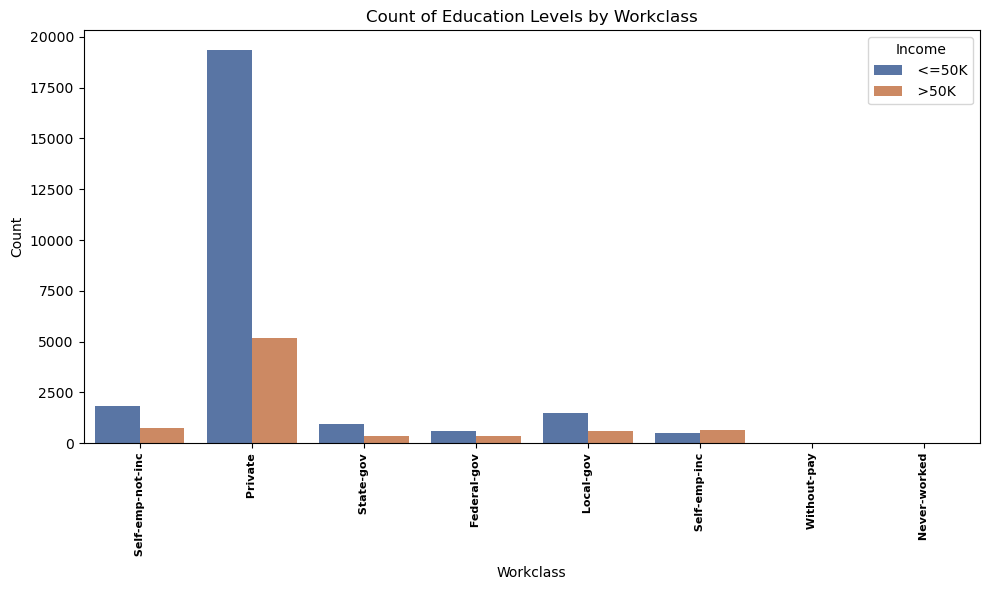

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Workclass', hue='Income', palette='deep')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Count of Education Levels by Workclass')
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
plt.show()

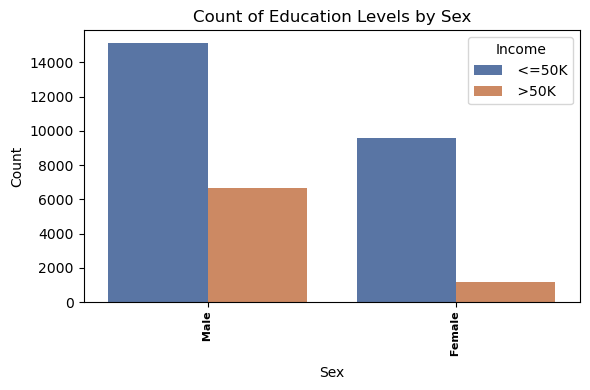

In [20]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sex', hue='Income', palette='deep')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Count of Education Levels by Sex')
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
plt.show()

Ratio of females is more getting <=50K in comparison to male.
Same in male only around 62000 males getting more than 50K.

<Figure size 800x800 with 0 Axes>

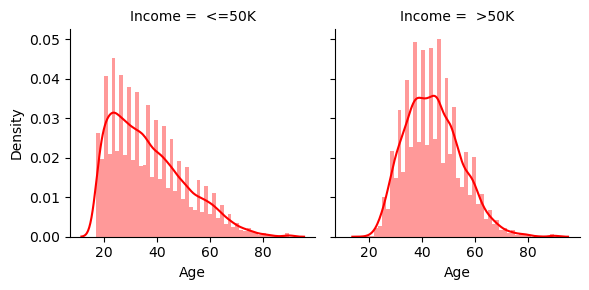

In [21]:
plt.figure(figsize=(8,8))
ax= sns.FacetGrid(df,col='Income')
ax.map(sns.distplot,'Age',color='r')
plt.show()

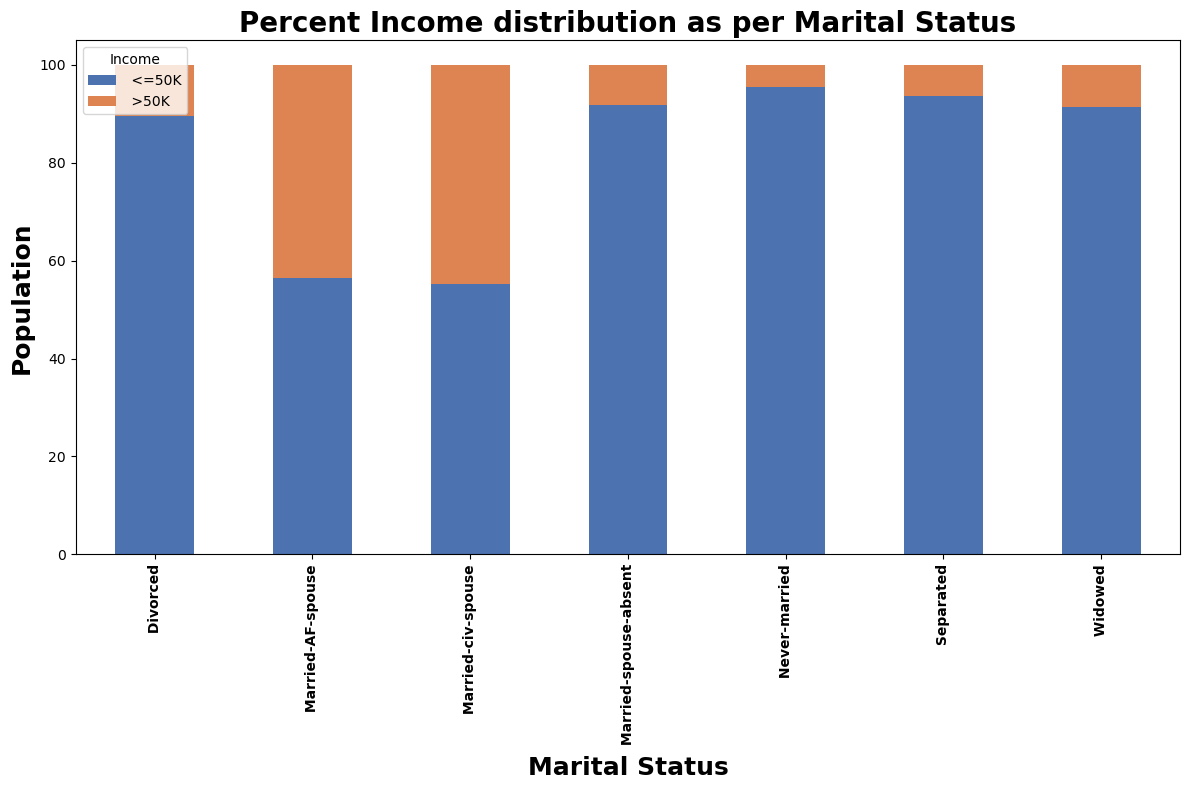

In [22]:
sns.set_palette('deep')
table = pd.crosstab(df['Marital_status'], df['Income'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True,figsize=(12,8))
plt.title('Percent Income distribution as per Marital Status', fontsize=20, fontweight='bold')
plt.xlabel('Marital Status', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

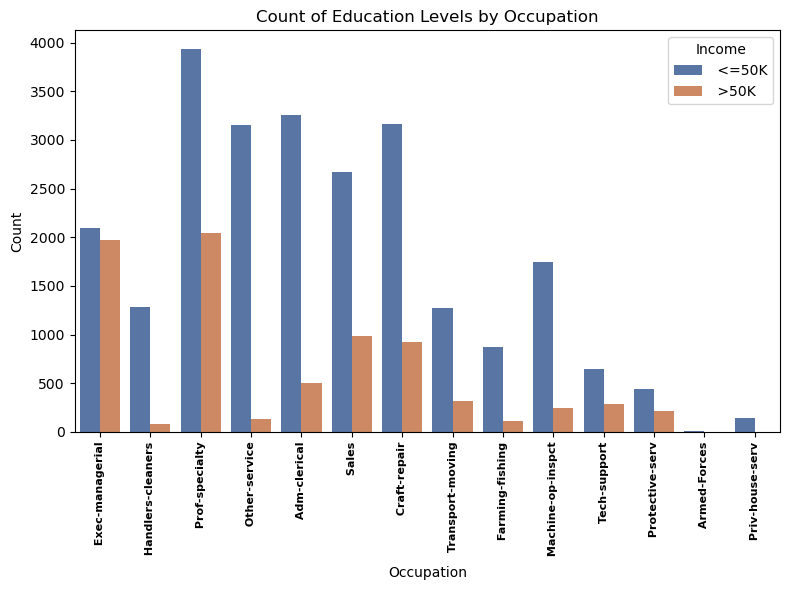

In [23]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x='Occupation', hue='Income', palette='deep')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Education Levels by Occupation')
plt.xticks(fontsize=8,fontweight ='bold',rotation=90)
plt.show()

In [24]:
pd.crosstab(df['Occupation'],df["Income"], margins=True).style.background_gradient(cmap='rainbow')

# Label Encoding of Categorical columns

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in categories:
    df[i] = le.fit_transform(df[i])
df.head()

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0   50          5   83311          9             13               2   
1   38          3  215646         11              9               0   
2   53          3  234721          1              7               2   
3   28          3  338409          9             13               2   
4   37          3  284582         12             14               2   

   Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0           3             0     4    1             0             0   
1           5             1     4    1             0             0   
2           5             0     2    1             0             0   
3           9             5     2    0             0             0   
4           3             5     4    0             0             0   

   Hours_per_week  Native_country  Income  
0              13              38       0  
1              40              38       0  
2              40              38       0  
3              40               4       0  
4              40              38       0

# Statistical analysis

In [27]:
df.describe().T

count           mean            std      min       25%  \
Age             32536.0      38.585536      13.638193     17.0      28.0   
Workclass       32536.0       3.094357       1.107449      0.0       3.0   
Fnlwgt          32536.0  189784.298992  105556.258211  12285.0  117831.5   
Education       32536.0      10.297547       3.870195      0.0       9.0   
Education_num   32536.0      10.081725       2.571622      1.0       9.0   
Marital_status  32536.0       2.611384       1.506304      0.0       2.0   
Occupation      32536.0       6.139476       3.973089      0.0       3.0   
Relationship    32536.0       1.446552       1.607087      0.0       0.0   
Race            32536.0       3.665816       0.848858      0.0       4.0   
Sex             32536.0       0.669228       0.470498      0.0       0.0   
Capital_gain    32536.0    1078.410069    7388.068465      0.0       0.0   
Capital_loss    32536.0      87.370912     403.107737      0.0       0.0   
Hours_per_week  32536.0      40.440343      12.347079      1.0      40.0   
Native_country  32536.0      36.419136       6.053903      0.0      38.0   
Income          32536.0       0.240933       0.427656      0.0       0.0   

                     50%        75%        max  
Age                 37.0      48.00       90.0  
Workclass            3.0       3.00        7.0  
Fnlwgt          178356.0  236993.25  1484705.0  
Education           11.0      12.00       15.0  
Education_num       10.0      12.00       16.0  
Marital_status       2.0       4.00        6.0  
Occupation           6.0       9.00       13.0  
Relationship         1.0       3.00        5.0  
Race                 4.0       4.00        4.0  
Sex                  1.0       1.00        1.0  
Capital_gain         0.0       0.00    99999.0  
Capital_loss         0.0       0.00     4356.0  
Hours_per_week      40.0      45.00       99.0  
Native_country      38.0      38.00       40.0  
Income               0.0       0.00        1.0

# Correlation between dataset

<Axes: >

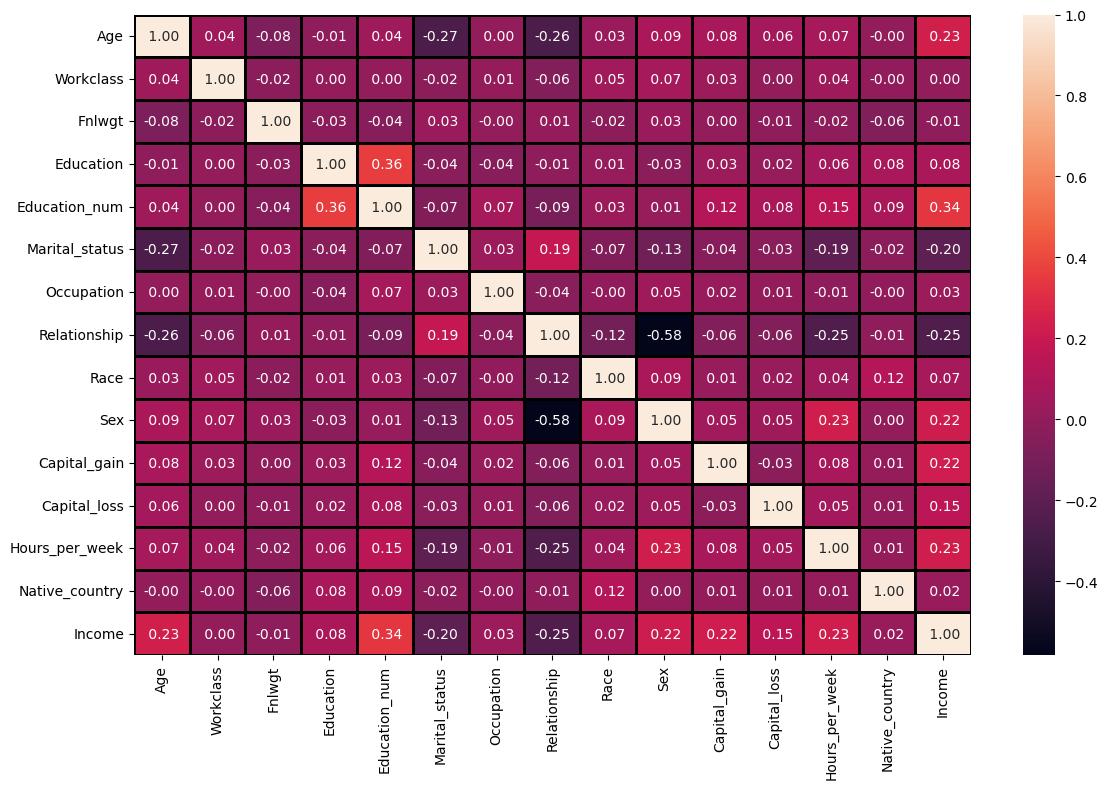

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

Relationship and Sex column are negatively correlated.

# Outlier Detection

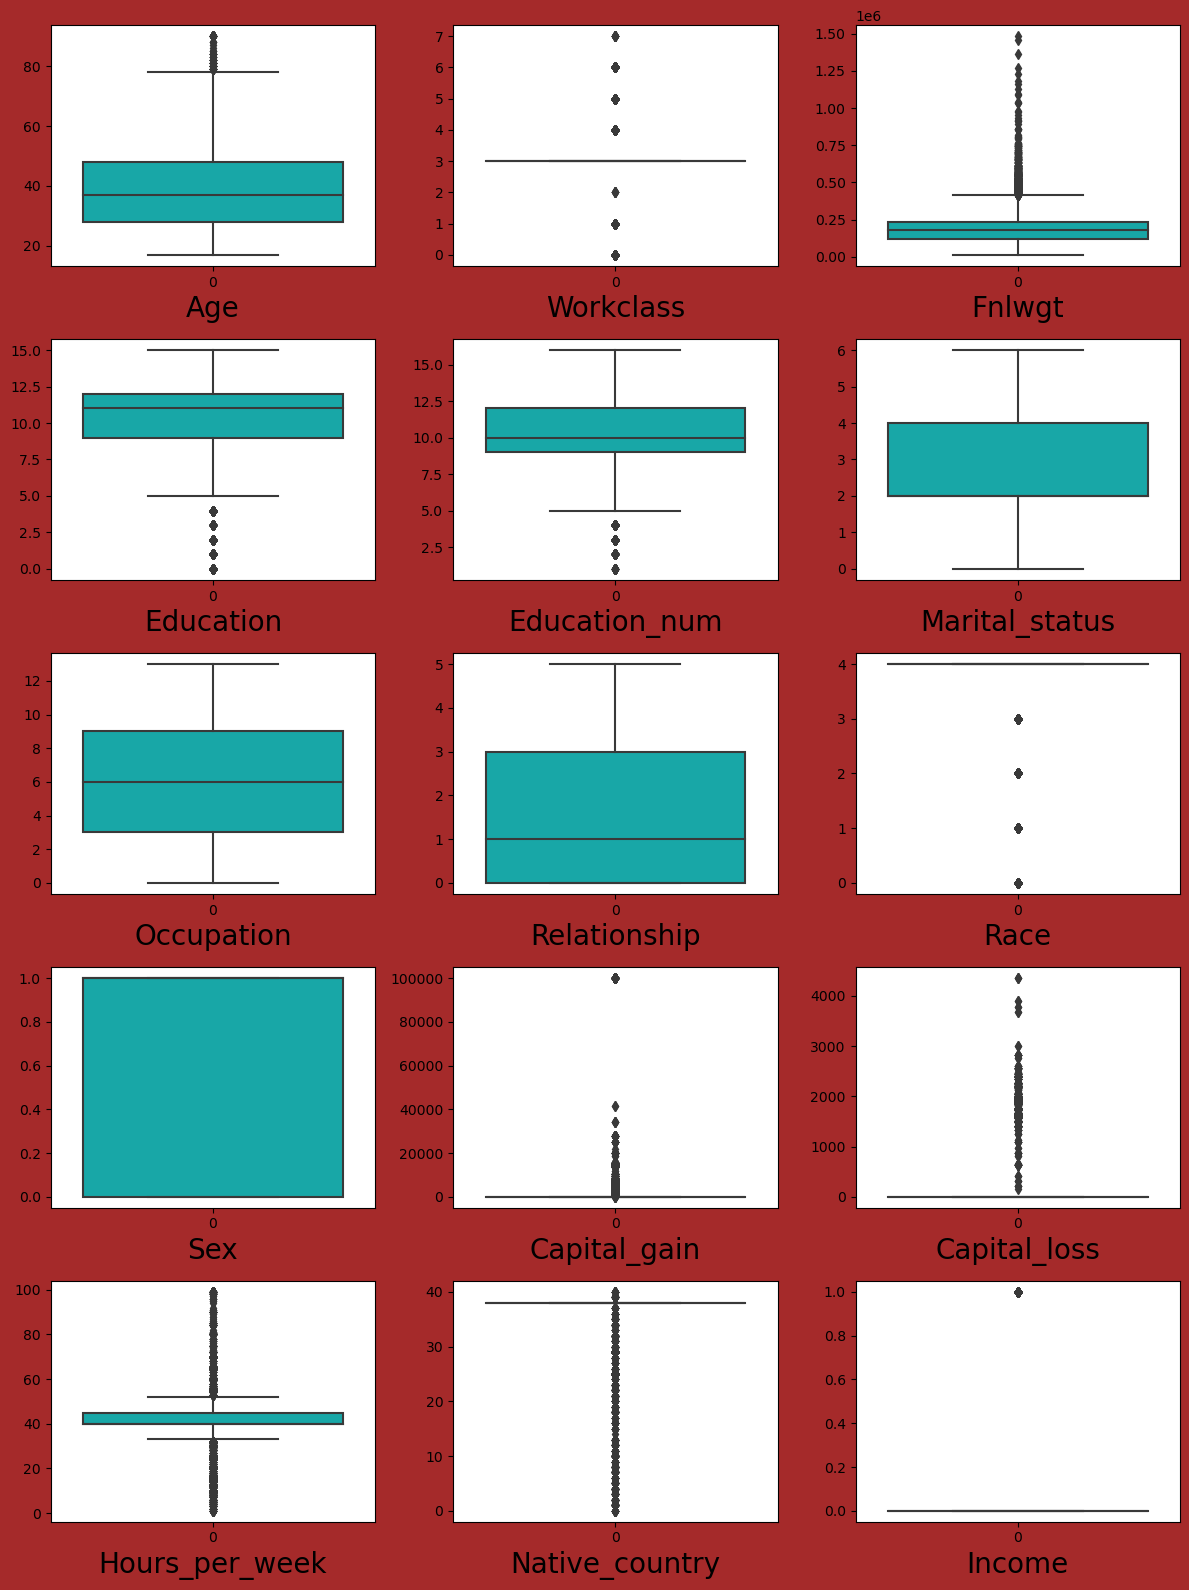

In [29]:
plt.figure(figsize=(12,16),facecolor='brown')
index=1
for column in df:
    if index <=15:
        ax = plt.subplot(5,3,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

# Removal of Outliers

In [30]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers =  ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num','Race', 'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [31]:
print ("Shape of the DataFrame before removing Outliers: ", df.shape)
print ("\nShape of the DataFrame after removing Outliers: ", df1.shape)
print ("\nPercentage of Data loss After Outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100,'%')

Shape of the DataFrame before removing Outliers:  (32536, 15)

Shape of the DataFrame after removing Outliers:  (27751, 15)

Percentage of Data loss After Outlier removal:  14.706786328989427 %


# Checking Skewness of Dataset

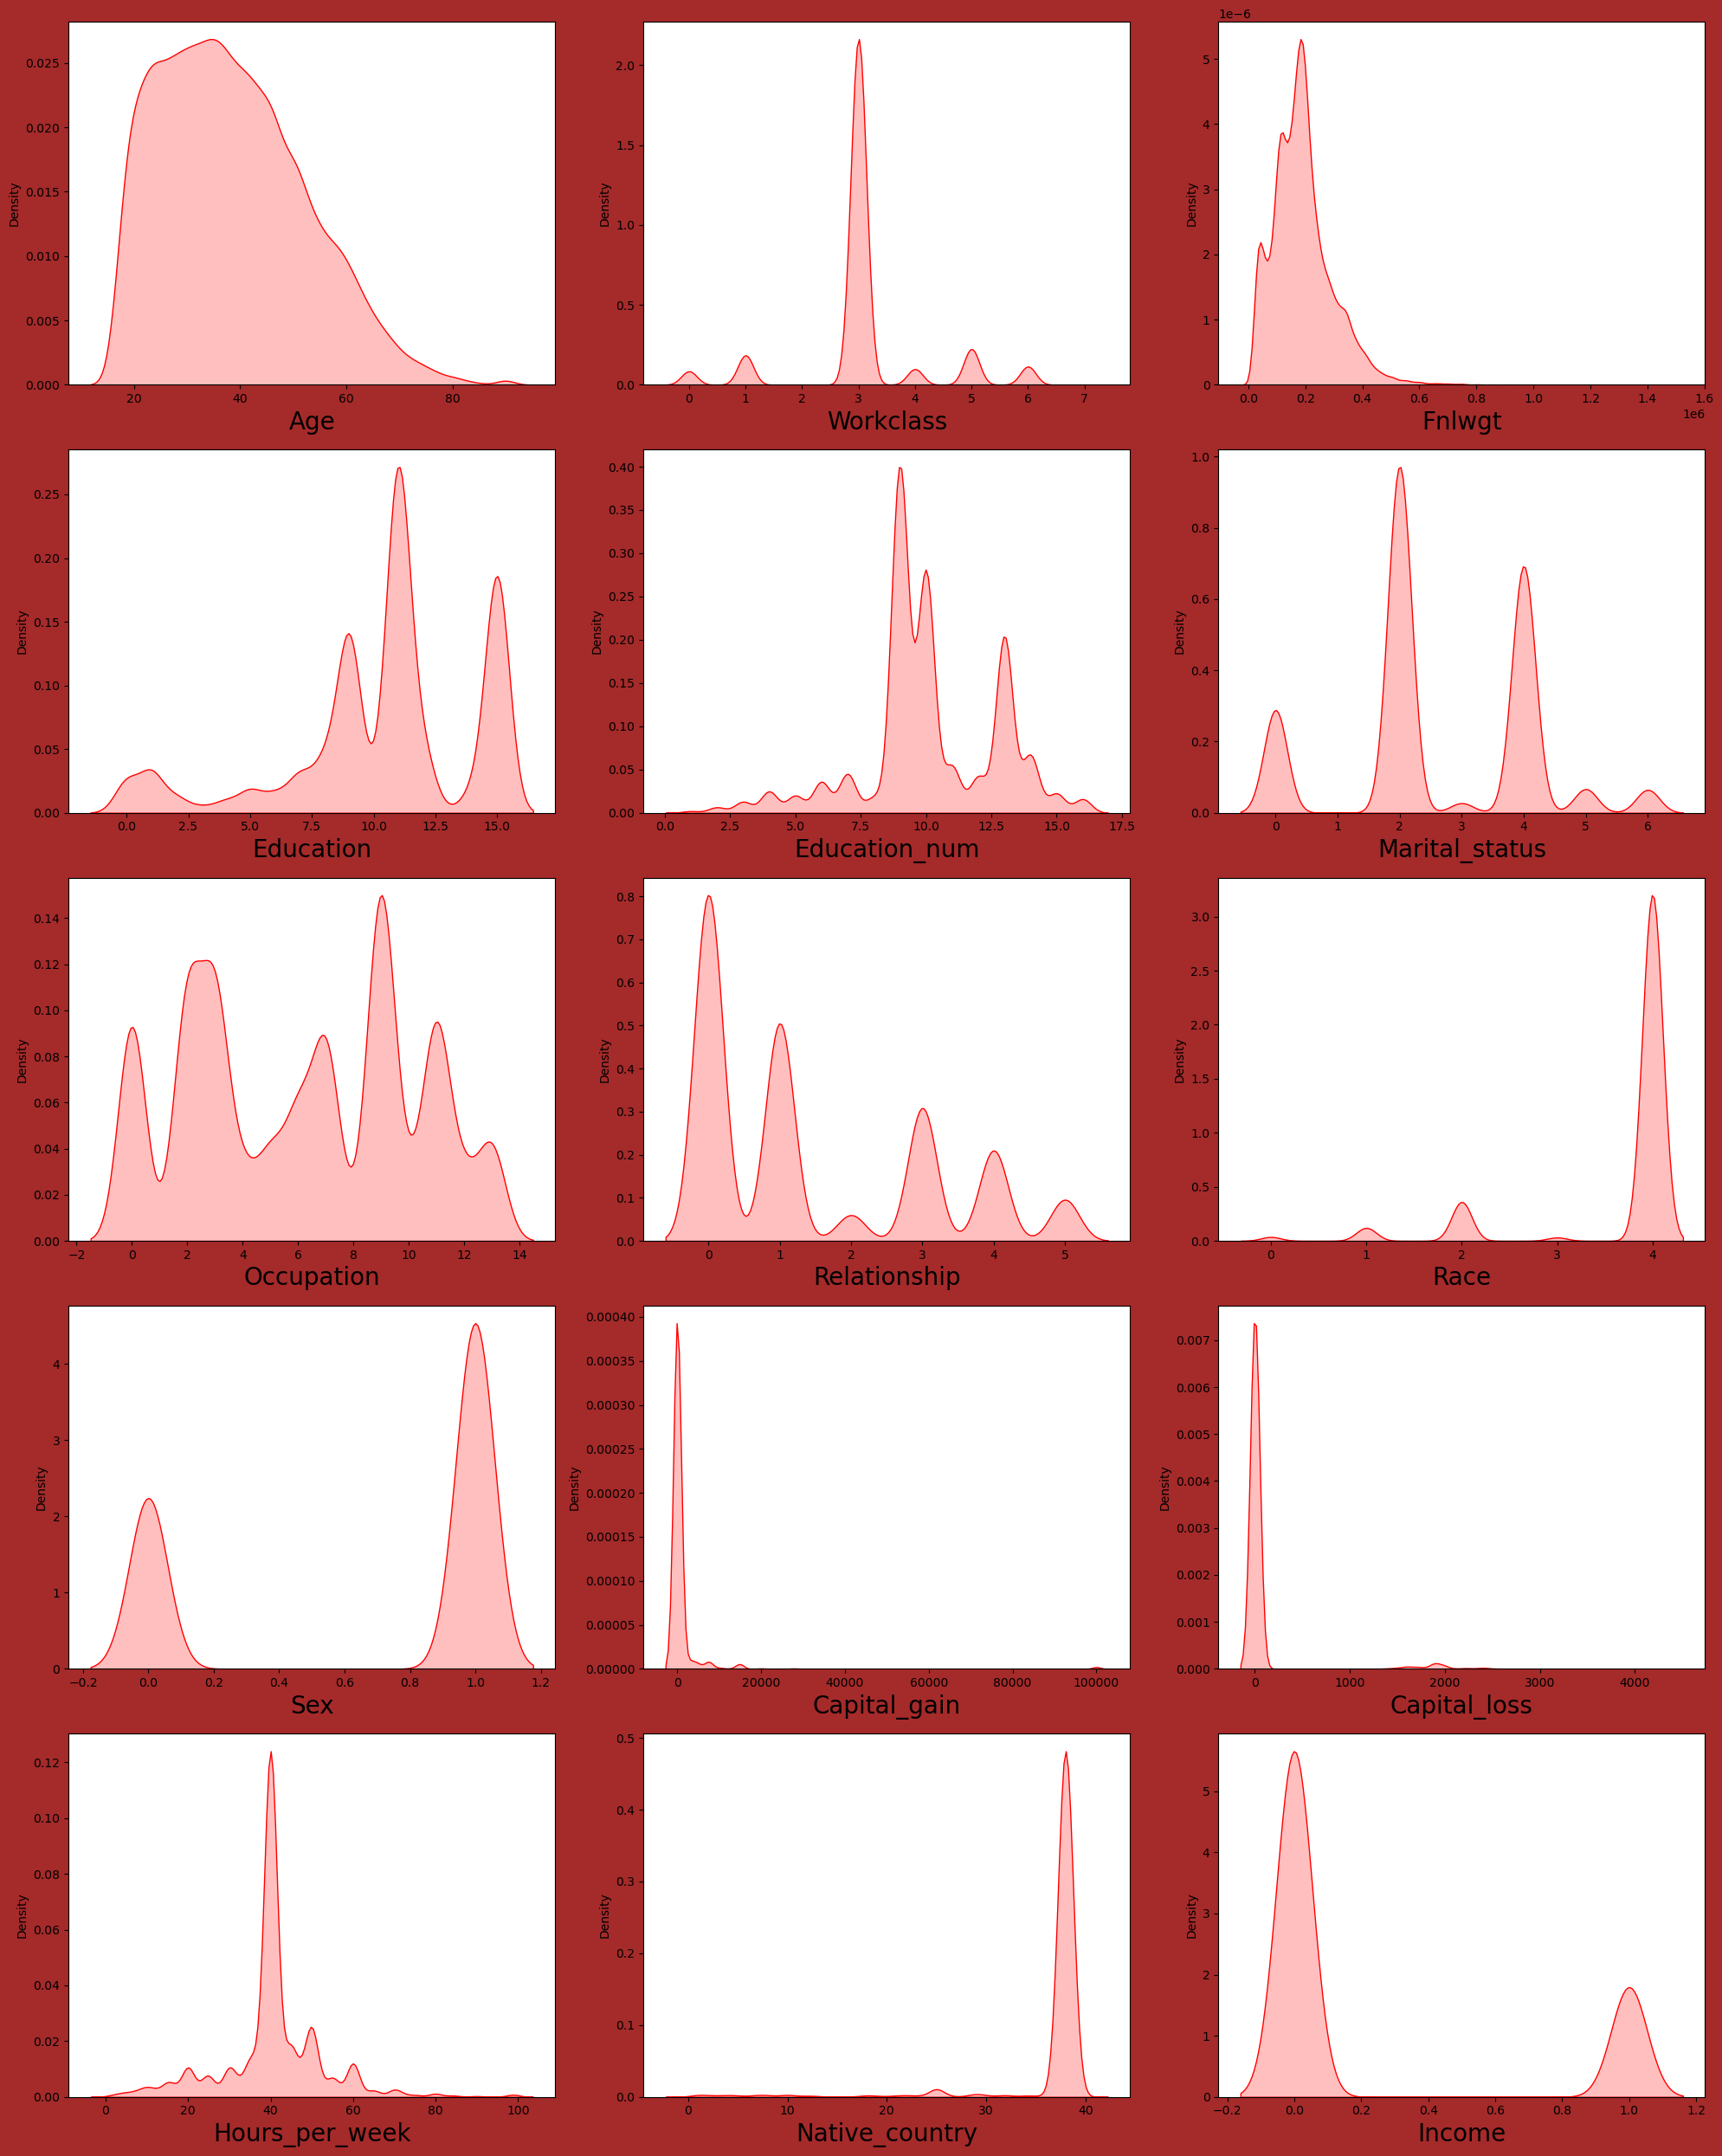

In [32]:
plt.figure(figsize=(20,25), facecolor='brown')
plotnumber=1
for column in df:
    if plotnumber <=15:
        ax = plt.subplot(5,3,plotnumber)
        sns.distplot(df[column], color='r',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()


In [33]:
df.skew()

Age                0.557657
Workclass          0.075983
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.000407
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -4.247065
Income             1.211640
dtype: float64

# Removal of Skewness


In [34]:
Right_skew=['Fnlwgt','Relationship','Capital_gain', 'Capital_loss']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method = 'yeo-johnson')
df[Right_skew] = scaler.fit_transform(df[Right_skew].values)

In [35]:
from scipy.stats import boxcox

# Columns with left-skewed data containing zeros
left_skewed_columns = ['Education','Sex','Native_country','Race']
# Apply Box-Cox transformation
df[left_skewed_columns] = df[left_skewed_columns].apply(lambda x: boxcox(x + 1)[0])
df.skew()

Age               0.557657
Workclass         0.075983
Fnlwgt            0.016961
Education        -0.309379
Education_num    -0.309454
Marital_status   -0.012692
Occupation        0.000407
Relationship      0.123000
Race             -2.010646
Sex              -0.719400
Capital_gain      3.015495
Capital_loss      4.297677
Hours_per_week    0.228752
Native_country   -2.984449
Income            1.211640
dtype: float64

# Spliting Dataset.

In [36]:
X = df.drop(columns = ["Income"])
y = df["Income"]

# Standard Scaling

In [37]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

# Varience_inflation_factor

In [38]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


vif_data = pd.DataFrame()
vif_data["Features List"]=X.columns
vif_data["VIF Value"]=[variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data

Features List  VIF Value
0              Age   0.691605
1        Workclass   0.698517
2           Fnlwgt   1.000624
3        Education   0.838734
4    Education_num   0.590421
5   Marital_status   0.811325
6       Occupation   0.874696
7     Relationship   1.012609
8             Race   0.782729
9              Sex   0.926486
10    Capital_gain   1.000242
11    Capital_loss   1.000100
12  Hours_per_week   0.625149
13  Native_country  11.903960

# Machine Learning Model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [40]:
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    
X_train.shape

(26028, 14)

# LogisticRegression

In [41]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 83.8660110633067 on Random_state 119


In [42]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.8311309157959434


Confusion matrix of Logistics Regression : 
 [[4616  309]
 [ 790  793]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.85      0.94      0.89      4925
           1       0.72      0.50      0.59      1583

    accuracy                           0.83      6508
   macro avg       0.79      0.72      0.74      6508
weighted avg       0.82      0.83      0.82      6508



# DecisionTreeClassifier

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

maxAccu1=0
maxRS1=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred1=dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy Score is: ', (maxAccu1)*100 ,'\nAt Random State: ', maxRS1)

Best accuracy Score is:  81.62261831591887 
At Random State:  190


# Classification Algorithm

In [44]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [45]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.8345113706207744


Confusion matrix : 
 [[4612  314]
 [ 763  819]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.94      0.90      4926
           1       0.72      0.52      0.60      1582

    accuracy                           0.83      6508
   macro avg       0.79      0.73      0.75      6508
weighted avg       0.83      0.83      0.82      6508



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.7977873386601106


Confusion matrix : 
 [[4132  794]
 [ 522 1060]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.84      0.86      4926
           1       0.57      0.67      0.62      1582

    accuracy                           0.80      6508
   macro avg       0.73      0.75      0.74      6508
weighted avg       0.81      0.80      0.80     

# Hyperparameter Tuning

In [46]:
from sklearn.model_selection import GridSearchCV
parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}
grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.791 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.797 total time=   0.6s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.799 total time=   0.7s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.800 total time=   0.6s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.796 total time=   0.7s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.792 total time=   1.4s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.793 total time=   1.3s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [47]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


# Final Model

In [48]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 400)

In [49]:
model.fit(X_train,y_train)
pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(y_test, pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(y_test,pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8305162876459742


Confusion matrix ofRandomForestClassifier : 
 [[4858   68]
 [1035  547]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

           0       0.82      0.99      0.90      4926
           1       0.89      0.35      0.50      1582

    accuracy                           0.83      6508
   macro avg       0.86      0.67      0.70      6508
weighted avg       0.84      0.83      0.80      6508



In [50]:
prediction=pd.DataFrame({'predicted values':pred,'actual values':y_test})
prediction.head(60)

predicted values  actual values
24667                 0              0
28100                 0              0
29227                 0              1
10346                 0              1
10923                 0              0
23766                 0              0
27977                 0              1
2752                  1              1
21192                 0              1
12080                 0              0
26657                 0              0
27614                 0              0
4610                  0              0
12777                 0              0
17071                 0              0
29694                 0              0
5787                  0              0
19835                 0              0
13144                 0              0
26102                 0              0
5778                  0              0
4680                  0              0
14597                 0              0
1582                  0              1
15582                 0              0
28148                 0              0
13156                 0              0
1450                  0              0
25758                 0              0
30541                 0              0
8420                  0              0
22136                 0              1
7353                  0              0
2880                  0              0
16657                 0              0
7940                  0              0
6065                  1              1
567                   0              0
24597                 0              0
11267                 0              0
32401                 0              1
13606                 0              0
13777                 0              0
3518                  0              0
20546                 0              0
32475                 0              0
17046                 0              0
26000                 0              0
28688                 0              0
54                    0              1
21622                 0              0
29757                 0              0
2613                  0              1
16813                 0              0
21763                 0              0
29833                 0              0
11871                 0              0
13311                 0              0
6904                  0              0
16062                 0              0

# Best Model Saving

In [51]:
import joblib
joblib.dump(model,'Census_Income_Project.pkl')

['Census_Income_Project.pkl']

Thanks..................

# Rainfall Weather Forecasting

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [53]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Rainfall%20Forecast/Rainfall.csv')

In [55]:
df.tail(60)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
8365  2012-10-21   Darwin     24.8     33.3       0.0          7.8      10.5   
8366  2012-10-22   Darwin     24.2     33.4       0.6          7.0       7.8   
8367  2012-10-23   Darwin     24.2     35.2       0.6          5.2      11.5   
8368  2012-10-24   Darwin     23.5     35.3       0.4          7.6      11.3   
8369  2012-10-25   Darwin     25.4     33.6       0.0          8.8       8.2   
8370  2012-10-26   Darwin     24.7     34.3       0.2          5.8      10.0   
8371  2012-10-27   Darwin     25.2     34.1       0.0          7.6      10.2   
8372  2012-10-28   Darwin     22.9     32.8       5.8          7.4       4.4   
8373  2012-10-29   Darwin     23.3     34.2       3.2          5.0      10.2   
8374  2012-10-30   Darwin     25.5     34.1       0.0          6.8      10.5   
8375  2012-10-31   Darwin     26.0     34.4       0.0          6.0      10.7   
8376  2012-11-01   Darwin     26.7     34.9       0.0          7.0       9.8   
8377  2012-11-02   Darwin     25.6     34.1       1.0          7.6      11.3   
8378  2012-11-03   Darwin     23.2     33.4      31.6         13.0       6.9   
8379  2012-11-04   Darwin     25.4     33.3       0.0          4.0       9.1   
8380  2012-11-05   Darwin     25.8     32.9       0.0          7.6       6.7   
8381  2012-11-06   Darwin     25.2     34.5       3.0          4.0       9.2   
8382  2012-11-07   Darwin     26.2     33.3       0.0          6.0       5.9   
8383  2012-11-08   Darwin     24.9     32.8      20.4          6.2       8.7   
8384  2012-11-09   Darwin     25.5     33.1       0.0          4.8       7.1   
8385  2012-11-10   Darwin     24.9     34.3       0.0          5.6       8.6   
8386  2017-05-18    Uluru      4.7     22.1       0.0          NaN       NaN   
8387  2017-05-19    Uluru      4.3     22.4       0.0          NaN       NaN   
8388  2017-05-20    Uluru      4.1     26.0       0.0          NaN       NaN   
8389  2017-05-21    Uluru      7.2     29.4       0.0          NaN       NaN   
8390  2017-05-22    Uluru      9.7     30.0       0.0          NaN       NaN   
8391  2017-05-23    Uluru      7.6     27.1       0.0          NaN       NaN   
8392  2017-05-24    Uluru     10.1     26.7       0.0          NaN       NaN   
8393  2017-05-25    Uluru     14.6     26.3       0.0          NaN       NaN   
8394  2017-05-26    Uluru     14.3     27.6       0.4          NaN       NaN   
8395  2017-05-27    Uluru      9.3     28.0       0.0          NaN       NaN   
8396  2017-05-28    Uluru      8.0     24.6       0.0          NaN       NaN   
8397  2017-05-29    Uluru     12.7     22.2       0.0          NaN       NaN   
8398  2017-05-30    Uluru      9.4     22.7       0.0          NaN       NaN   
8399  2017-05-31    Uluru      5.4     20.5       0.0          NaN       NaN   
8400  2017-06-01    Uluru      5.6     19.4       0.0          NaN       NaN   
8401  2017-06-02    Uluru      1.5     19.2       0.0          NaN       NaN   
8402  2017-06-03    Uluru      3.8     19.8       0.0          NaN       NaN   
8403  2017-06-04    Uluru      4.5     18.8       0.0          NaN       NaN   
8404  2017-06-05    Uluru      4.9     20.7       0.0          NaN       NaN   
8405  2017-06-06    Uluru      1.2     20.8       0.0          NaN       NaN   
8406  2017-06-07    Uluru      0.5     21.7       0.0          NaN       NaN   
8407  2017-06-08    Uluru      4.0     20.0       0.0          NaN       NaN   
8408  2017-06-09    Uluru      3.4     19.8       0.0          NaN       NaN   
8409  2017-06-10    Uluru      3.2     18.6       0.0          NaN       NaN   
8410  2017-06-11    Uluru      2.4     19.1       0.0          NaN       NaN   
8411  2017-06-12    Uluru      5.1     19.7       0.0          NaN       NaN   
8412  2017-06-13    Uluru      2.5     21.2       0.0          NaN       NaN   
8413  2017-06-14    Uluru      2.3     21.4       0.0          NaN       NaN   
8414  2017-0

In [56]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [57]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 8425
Number of Columns: 23


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

# Extracting Date,Month and Year from Date column

In [59]:
df['Date']=pd.to_datetime(df['Date'])
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year
df.drop(columns=['Date'],inplace=True)

df.duplicated().sum() 

1663

In [60]:
df = df.drop_duplicates()
#check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

Comment:

No whitespace, NA, '-' exist in dataset.

# Checking Null Values

Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
Day                 0
Month               0
Year                0
dtype: int64


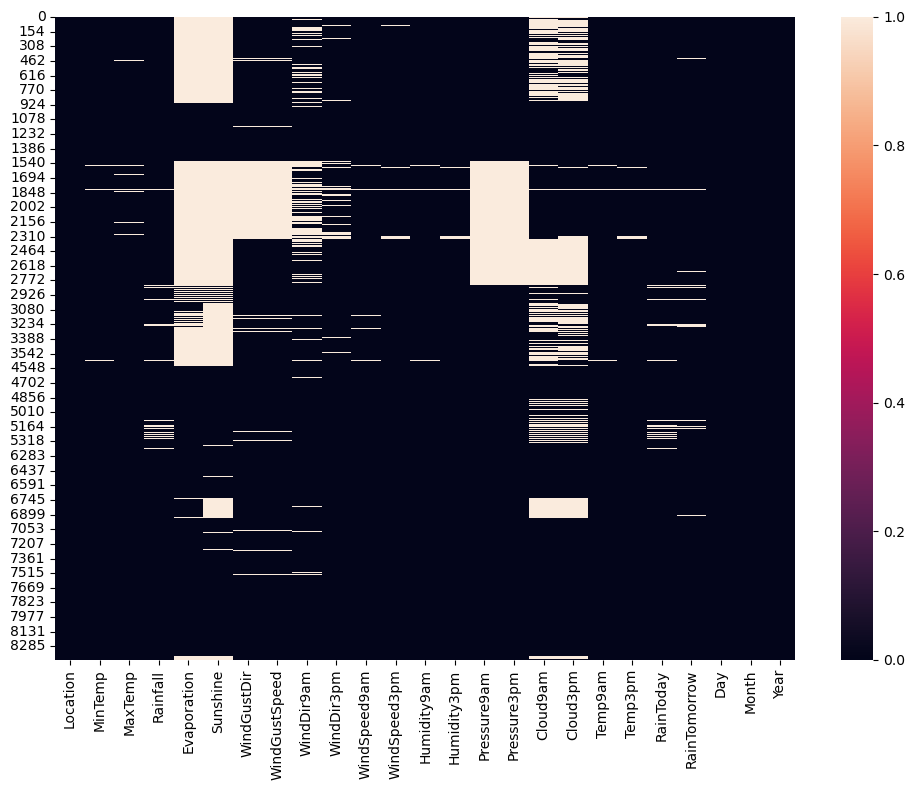

In [61]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
print(df.isnull().sum())

In [62]:
Null_percentage=(df.isnull().mean()*100).round(2)
Null_percentage.sort_values(ascending=False).apply(lambda x: f"{x}%")

Sunshine         47.86%
Evaporation       43.2%
Cloud3pm         28.13%
Cloud9am          27.6%
Pressure3pm      19.39%
Pressure9am      19.34%
WindGustDir      13.93%
WindGustSpeed    13.93%
WindDir9am       11.74%
WindDir3pm        4.35%
RainTomorrow      2.04%
RainToday         2.04%
Rainfall          2.04%
WindSpeed3pm      1.48%
Humidity3pm       1.42%
Temp3pm           1.36%
MinTemp           1.04%
WindSpeed9am      0.93%
MaxTemp           0.84%
Humidity9am        0.8%
Temp9am           0.75%
Month              0.0%
Location           0.0%
Day                0.0%
Year               0.0%
dtype: object

# Handling Nulls

In [63]:
#filling (WindGustDir,WindDir9am,WindSpeed9am) column With Mode of the column.
df['WindGustDir'].fillna(value=df['WindGustDir'].mode()[0], inplace= True)
df['WindDir9am'].fillna(value=df['WindDir9am'].mode()[0], inplace= True)
df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode()[0], inplace= True)
df['RainToday'].fillna(value=df['RainToday'].mode()[0], inplace= True)
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode()[0], inplace= True)

In [64]:
#filling null column with mean value of column.
df['Sunshine'].fillna(value=df['Sunshine'].mean(), inplace= True)
df['Evaporation'].fillna(value=df['Evaporation'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(), inplace= True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(), inplace= True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(), inplace= True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(), inplace= True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(), inplace= True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(), inplace= True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(), inplace= True)
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace= True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace= True)




df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

Now we can see that above graph 📊 Dataset have no Nulls

In [66]:
df.shape

(6762, 25)

# Exploratory Data Analysis

Univariate Analysis

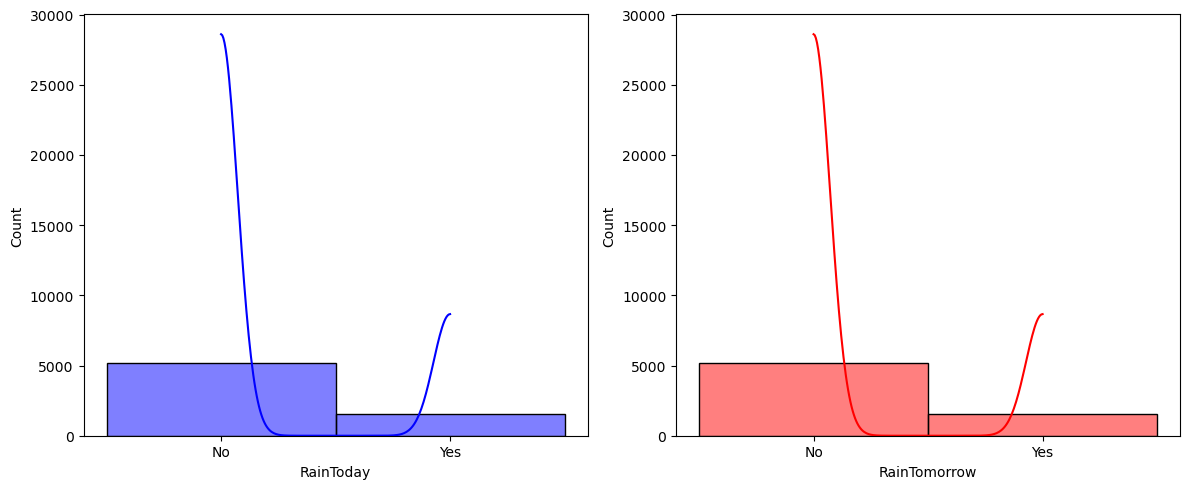

In [67]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['RainToday'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['RainTomorrow'],kde=True,color='r')
plt.show()

In [68]:
df['Location'].value_counts() 

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [69]:
df['WindDir9am'].value_counts() 

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64

In [70]:
df['WindDir3pm'].value_counts() 


SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64

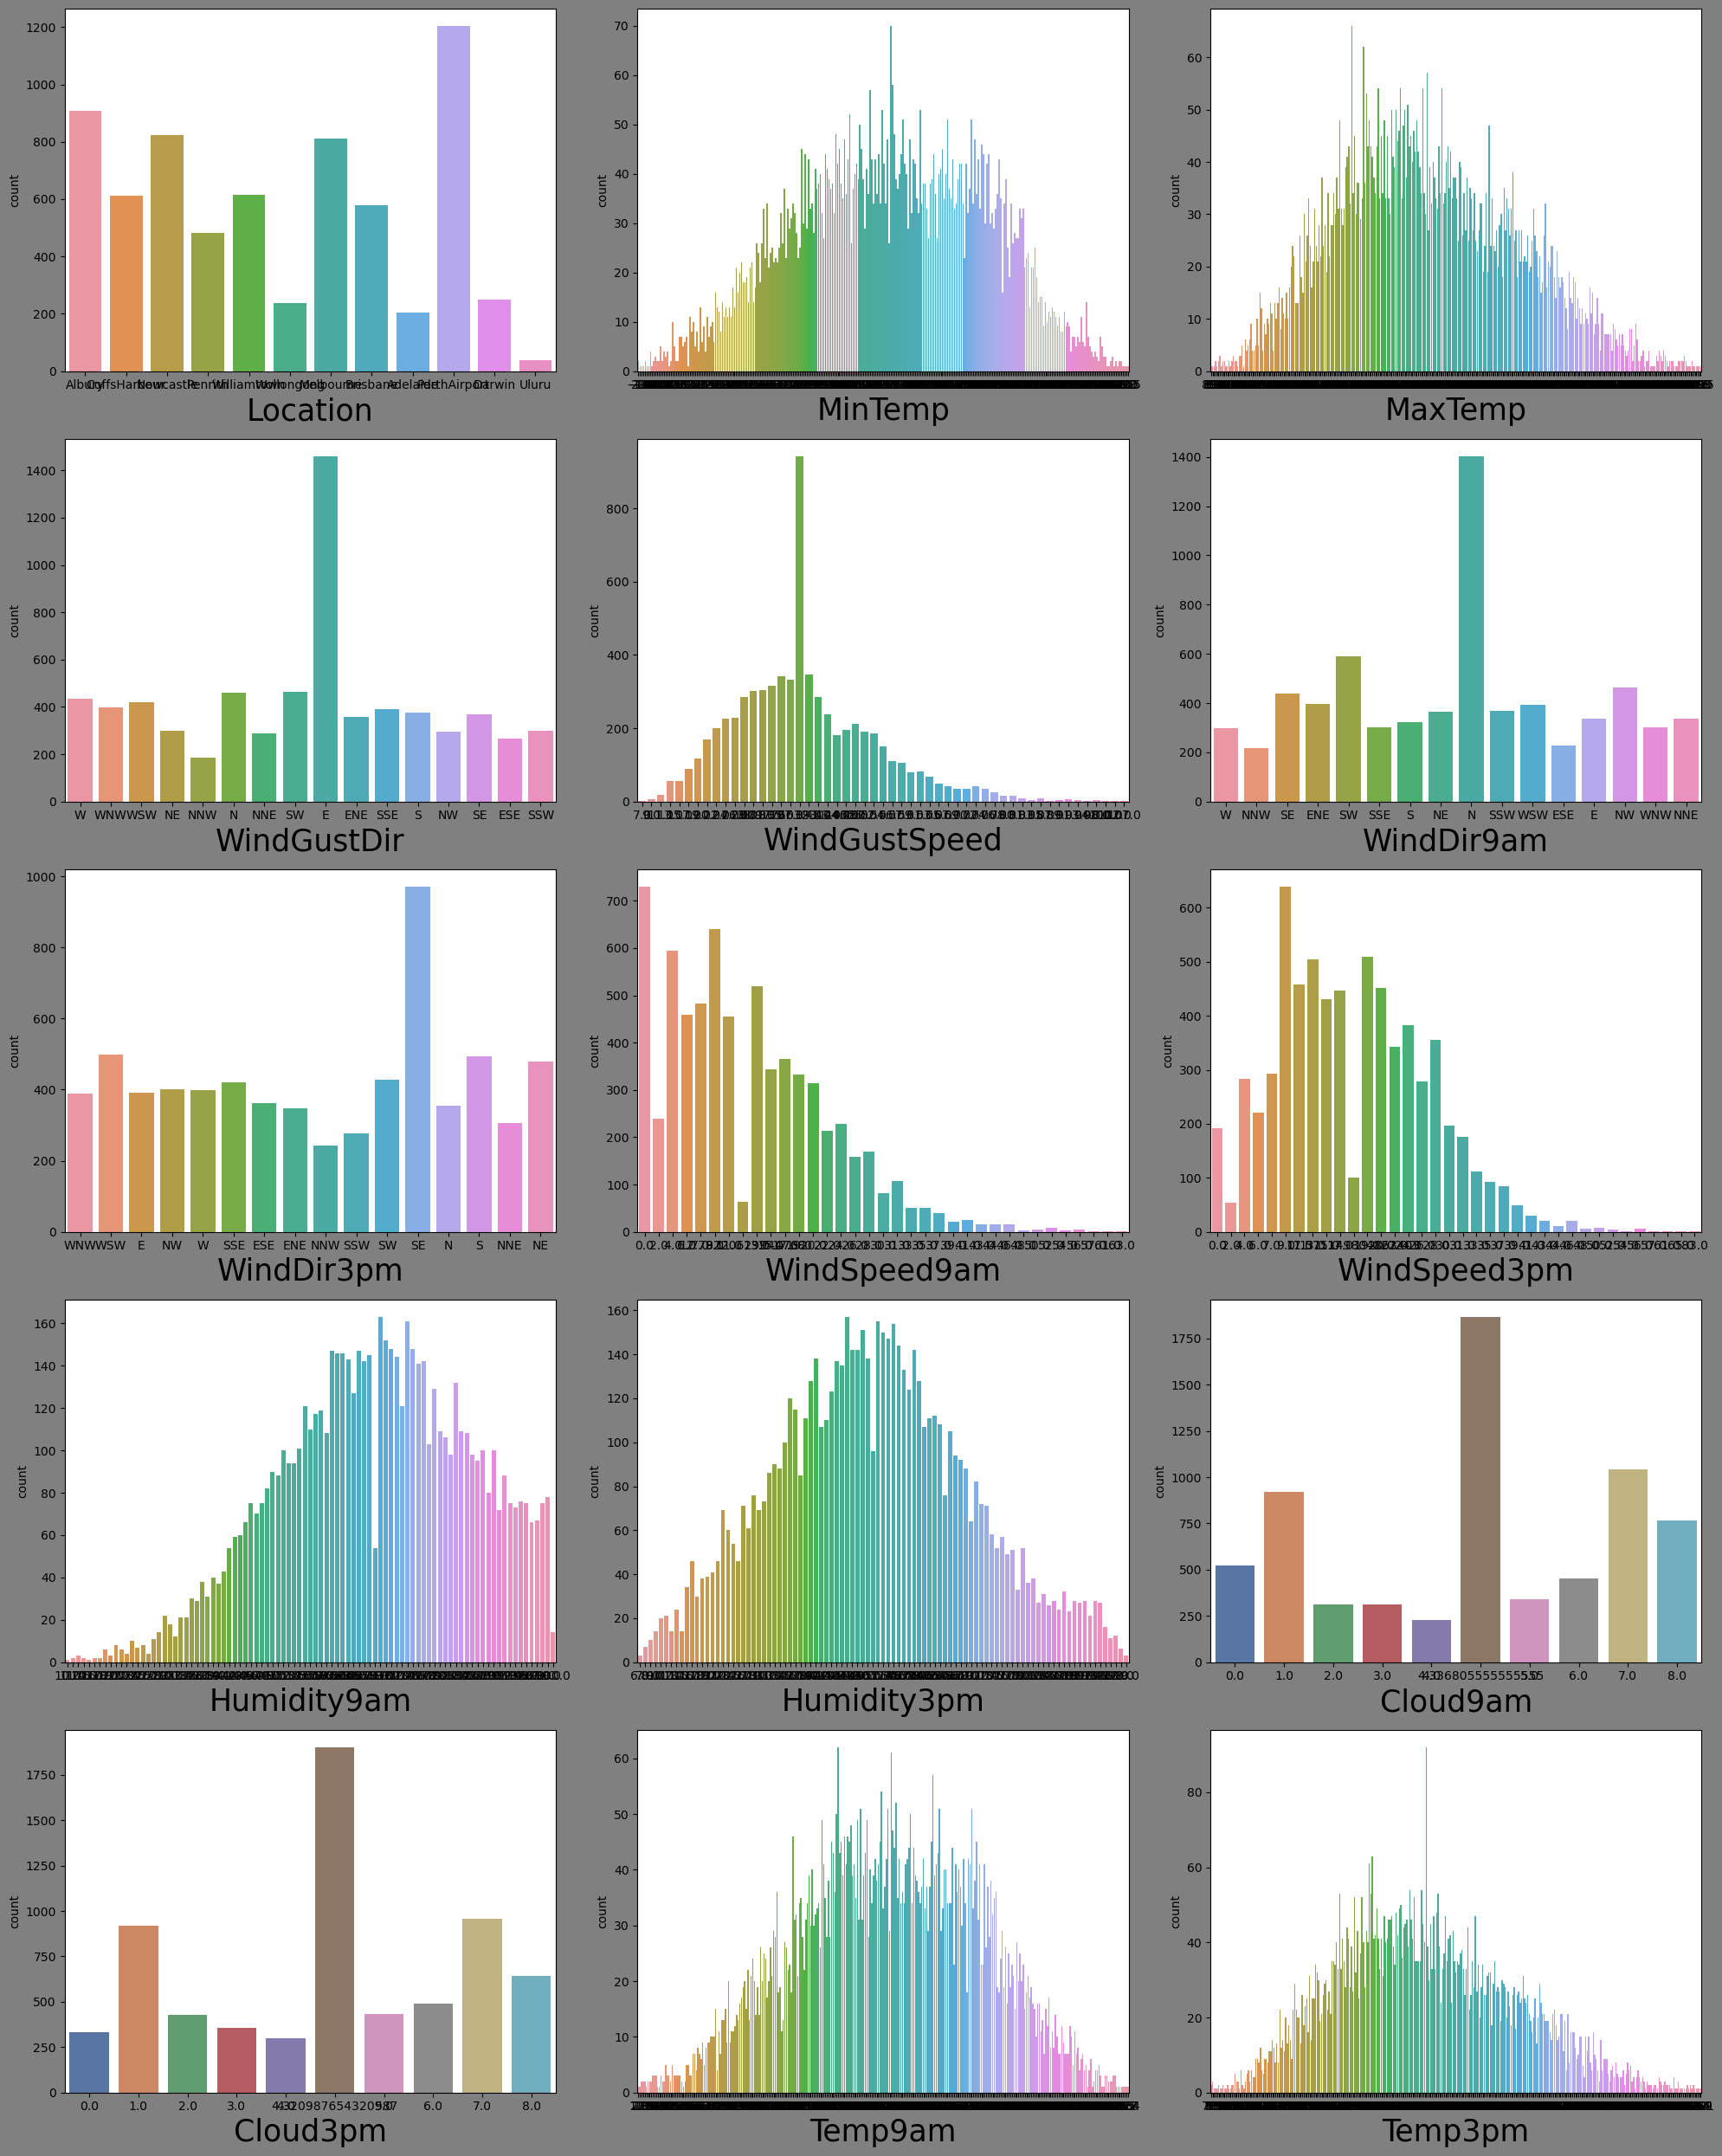

In [71]:
sns.set_palette('deep')
plt.figure(figsize=(20,25), facecolor='grey')

categories =['Location', 'MinTemp', 'MaxTemp',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i, category in enumerate(categories, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

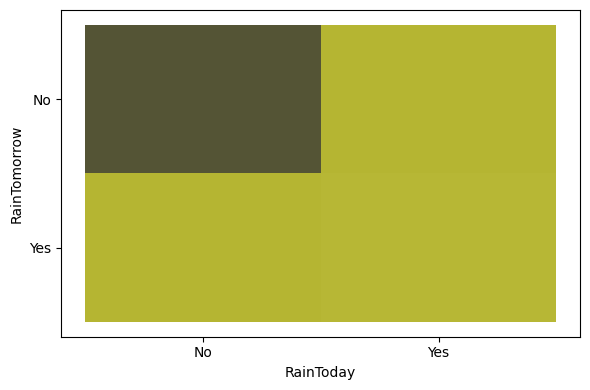

In [72]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='RainToday', y='RainTomorrow',color='y')
plt.show()

# Bivariate Analysis

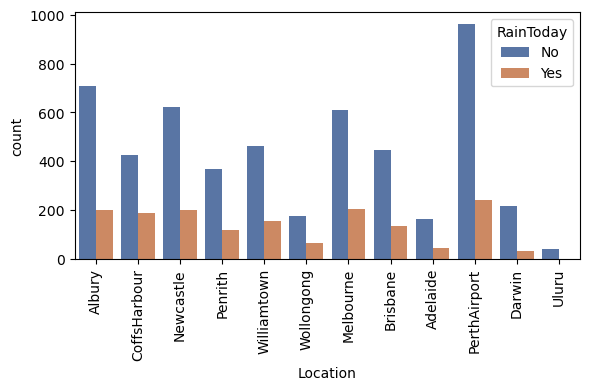

In [73]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Location', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

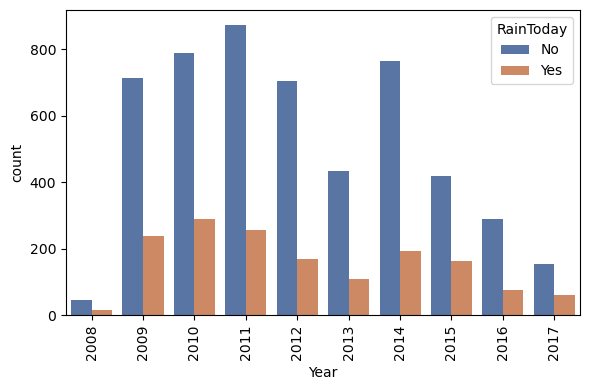

In [74]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Year', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

Comment -

Maximum RainFall in 2009,2010 & 2011.
Minimum Rainfall in 2008,2016 & 2017

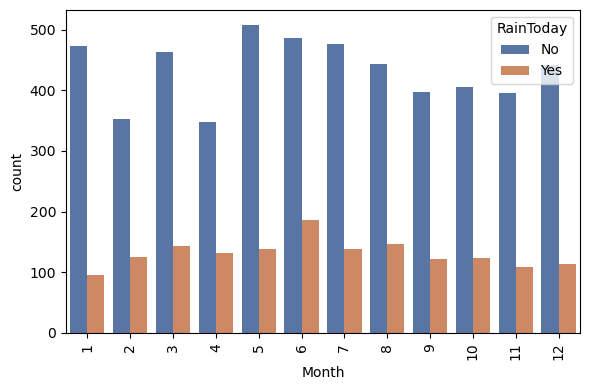

In [75]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Month', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

Comment -

Maximum RainFall in month of June.
Minimum Rainfall in month of January.

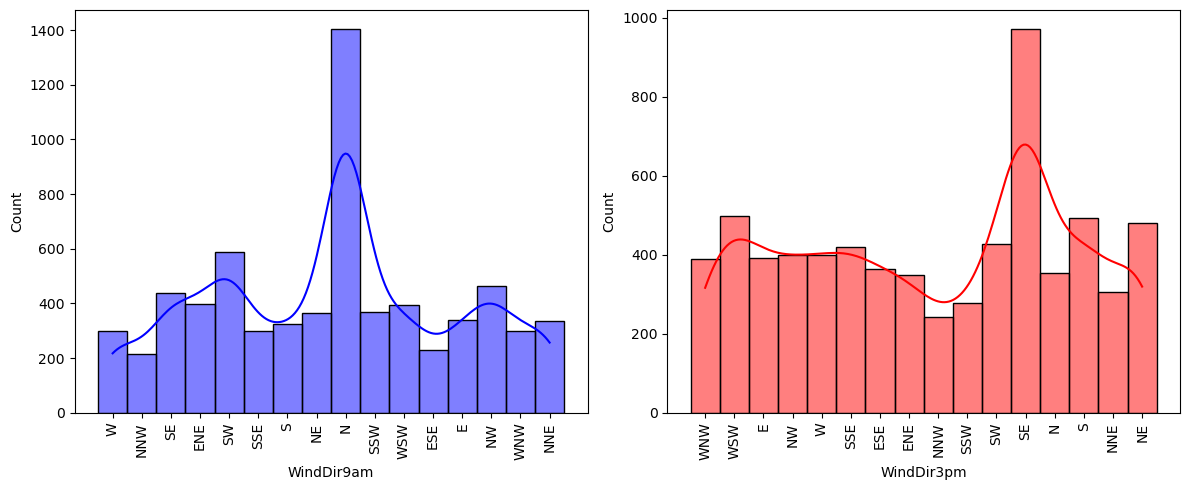

In [76]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindDir9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['WindDir3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()


Wind direction at 9AM is in North Direction.
Wind direction at 3PM is in South East Direction Most of the time.

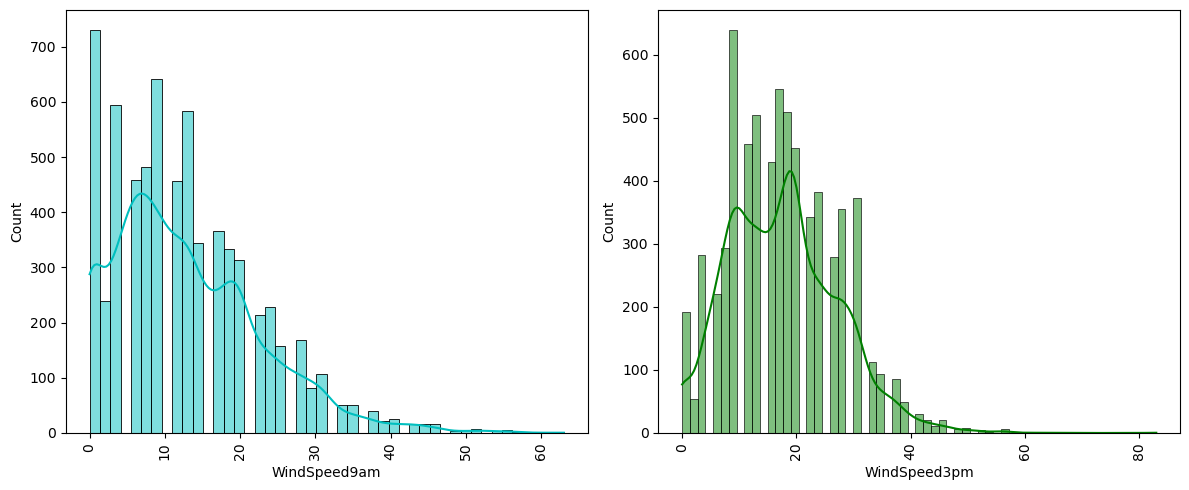

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindSpeed9am'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['WindSpeed3pm'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.show()


Wind Speed at 9AM is Less than 10 Km/s.
Wind Speed at 4PM is 20 Km/s Most of the time.

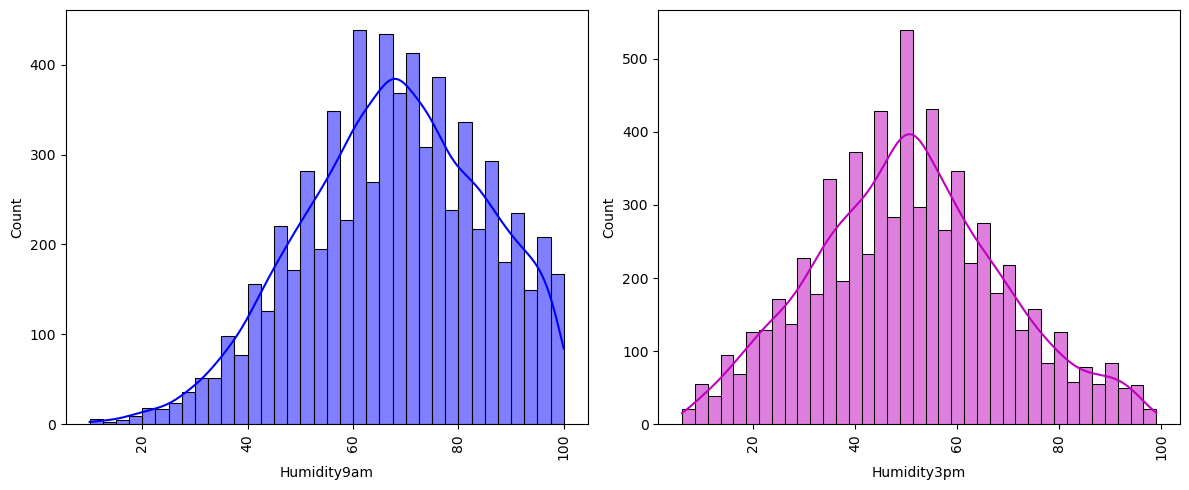

In [78]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Humidity9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Humidity3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Humidity at 9AM is 60-88 .
Humidity at 4PM is 40-65 Most of the time.

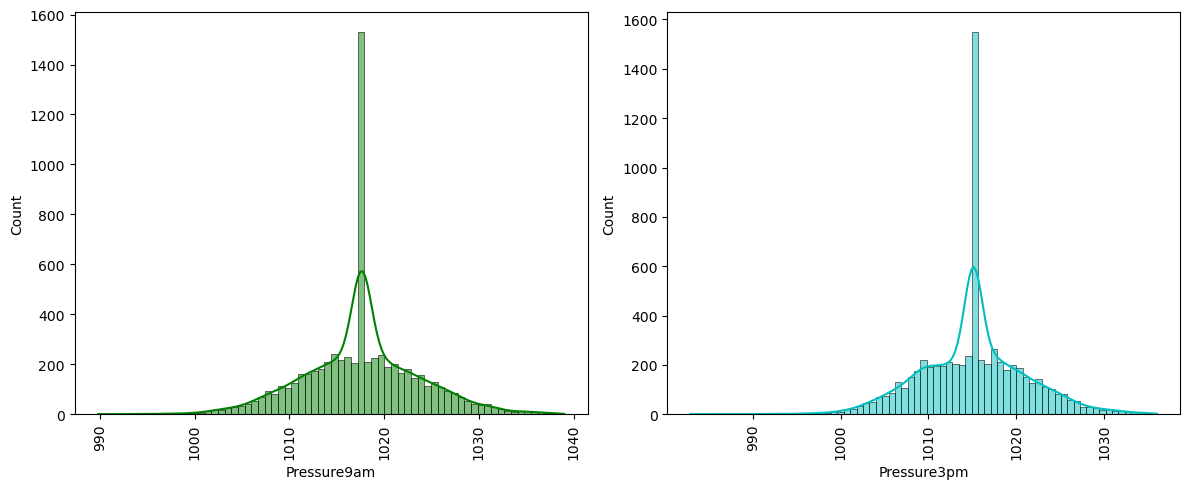

In [79]:
#-Plotting histogram for Pressure at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Pressure9am'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Pressure3pm'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.show()


Pressure at 9AM is 1018 .
Pressure at 3PM is 1015 .

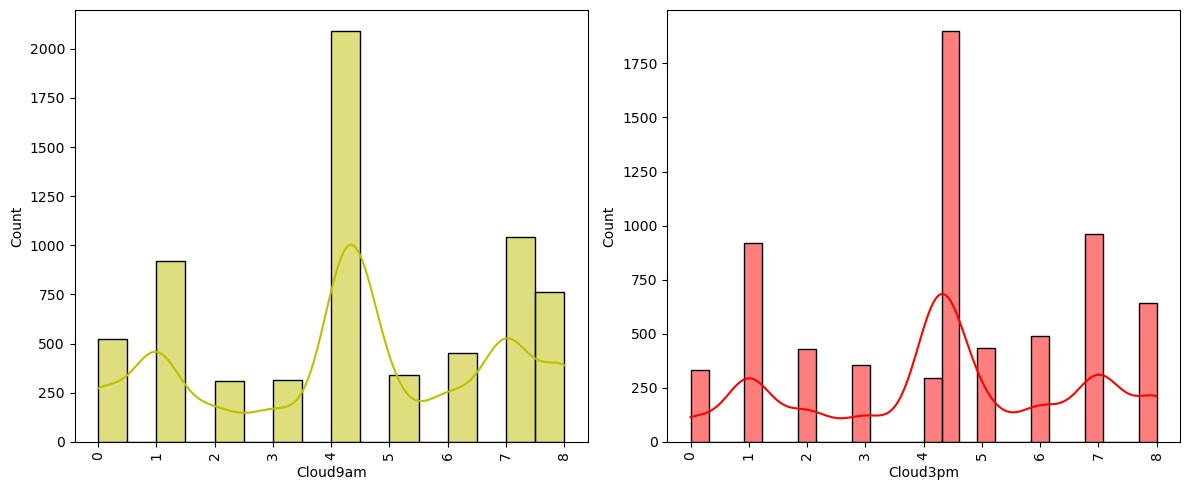

In [81]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Cloud9am'],kde=True,color='y')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Cloud3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Density of Cloud at 9am And 3pm is Maximum at 4.

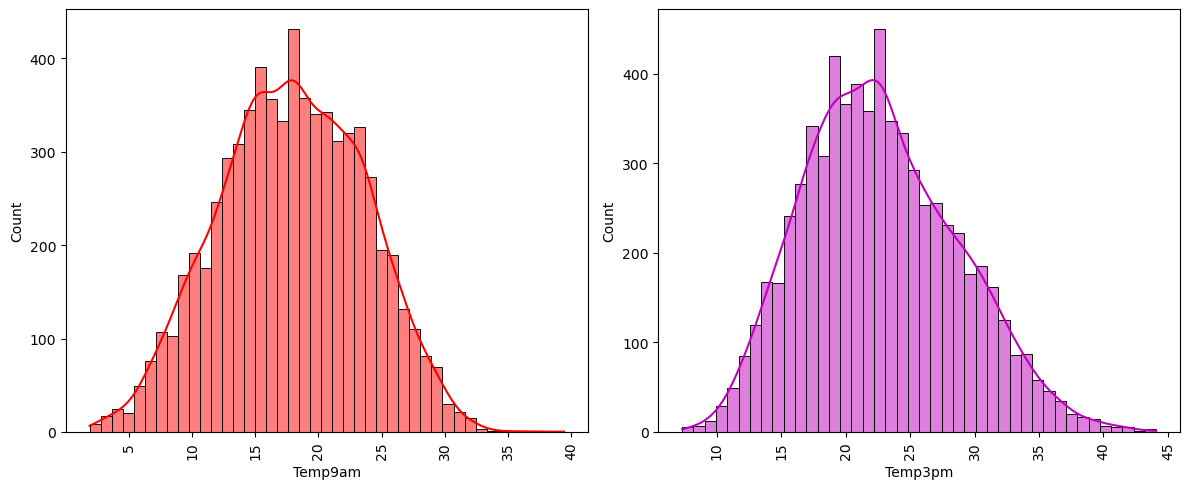

In [82]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Temp9am'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['Temp3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()


Average Temperature high at (9am And 3pm) is 15 to 30

# Encoding Categorical Value to Numeric

In [83]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Location','WindGustDir','WindDir9am','WindDir3pm']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Statistical Analysis

In [84]:
df.describe().T

count         mean        std     min          25%  \
Location       6762.0     5.323721   3.099455     0.0     2.250000   
MinTemp        6762.0    13.109145   5.540667    -2.0     9.000000   
MaxTemp        6762.0    24.098345   6.130123     8.2    19.600000   
Rainfall       6762.0     2.780148  10.482769     0.0     0.000000   
Evaporation    6762.0     5.302395   3.343713     0.0     4.000000   
Sunshine       6762.0     7.890896   2.733639     0.0     7.890896   
WindGustDir    6762.0     6.610470   5.233746     0.0     1.000000   
WindGustSpeed  6762.0    38.977663  13.376457     7.0    30.000000   
WindDir9am     6762.0     7.013310   4.550702     0.0     3.000000   
WindDir3pm     6762.0     7.842798   4.486894     0.0     4.000000   
WindSpeed9am   6762.0    12.782206   9.787577     0.0     6.000000   
WindSpeed3pm   6762.0    17.571150   9.548634     0.0    11.000000   
Humidity9am    6762.0    67.506559  17.182700    10.0    56.000000   
Humidity3pm    6762.0    50.467147  18.498341     6.0    38.000000   
Pressure9am    6762.0  1017.626311   6.027914   989.8  1014.200000   
Pressure3pm    6762.0  1015.119923   5.967638   982.9  1011.500000   
Cloud9am       6762.0     4.336806   2.474649     0.0     2.000000   
Cloud3pm       6762.0     4.320988   2.323276     0.0     3.000000   
Temp9am        6762.0    17.895038   5.722411     1.9    13.900000   
Temp3pm        6762.0    22.708561   5.971845     7.3    18.400000   
Day            6762.0    15.737208   8.793898     1.0     8.000000   
Month          6762.0     6.462141   3.377471     1.0     4.000000   
Year           6762.0  2012.052203   2.301057  2008.0  2010.000000   

                       50%          75%     max  
Location          6.000000     8.000000    11.0  
MinTemp          13.109145    17.400000    28.5  
MaxTemp          23.500000    28.400000    45.5  
Rainfall          0.000000     1.200000   371.0  
Evaporation       5.302395     5.302395   145.0  
Sunshine          7.890896     9.200000    13.9  
WindGustDir       7.000000    12.000000    15.0  
WindGustSpeed    38.977663    46.000000   107.0  
WindDir9am        7.000000    11.000000    15.0  
WindDir3pm        9.000000    12.000000    15.0  
WindSpeed9am     11.000000    19.000000    63.0  
WindSpeed3pm     17.000000    24.000000    83.0  
Humidity9am      68.000000    80.000000   100.0  
Humidity3pm      50.000000    62.000000    99.0  
Pressure9am    1017.626311  1020.900000  1039.0  
Pressure3pm    1015.119923  1018.400000  1036.0  
Cloud9am          4.336806     7.000000     8.0  
Cloud3pm          4.320988     6.000000     8.0  
Temp9am          17.900000    22.200000    39.4  
Temp3pm          22.300000    26.800000    44.1  
Day              16.000000    23.000000    31.0  
Month             6.000000     9.000000    12.0  
Year           2012.000000  2014.000000  2017.0

# Correlation Between Dataset

<Axes: >

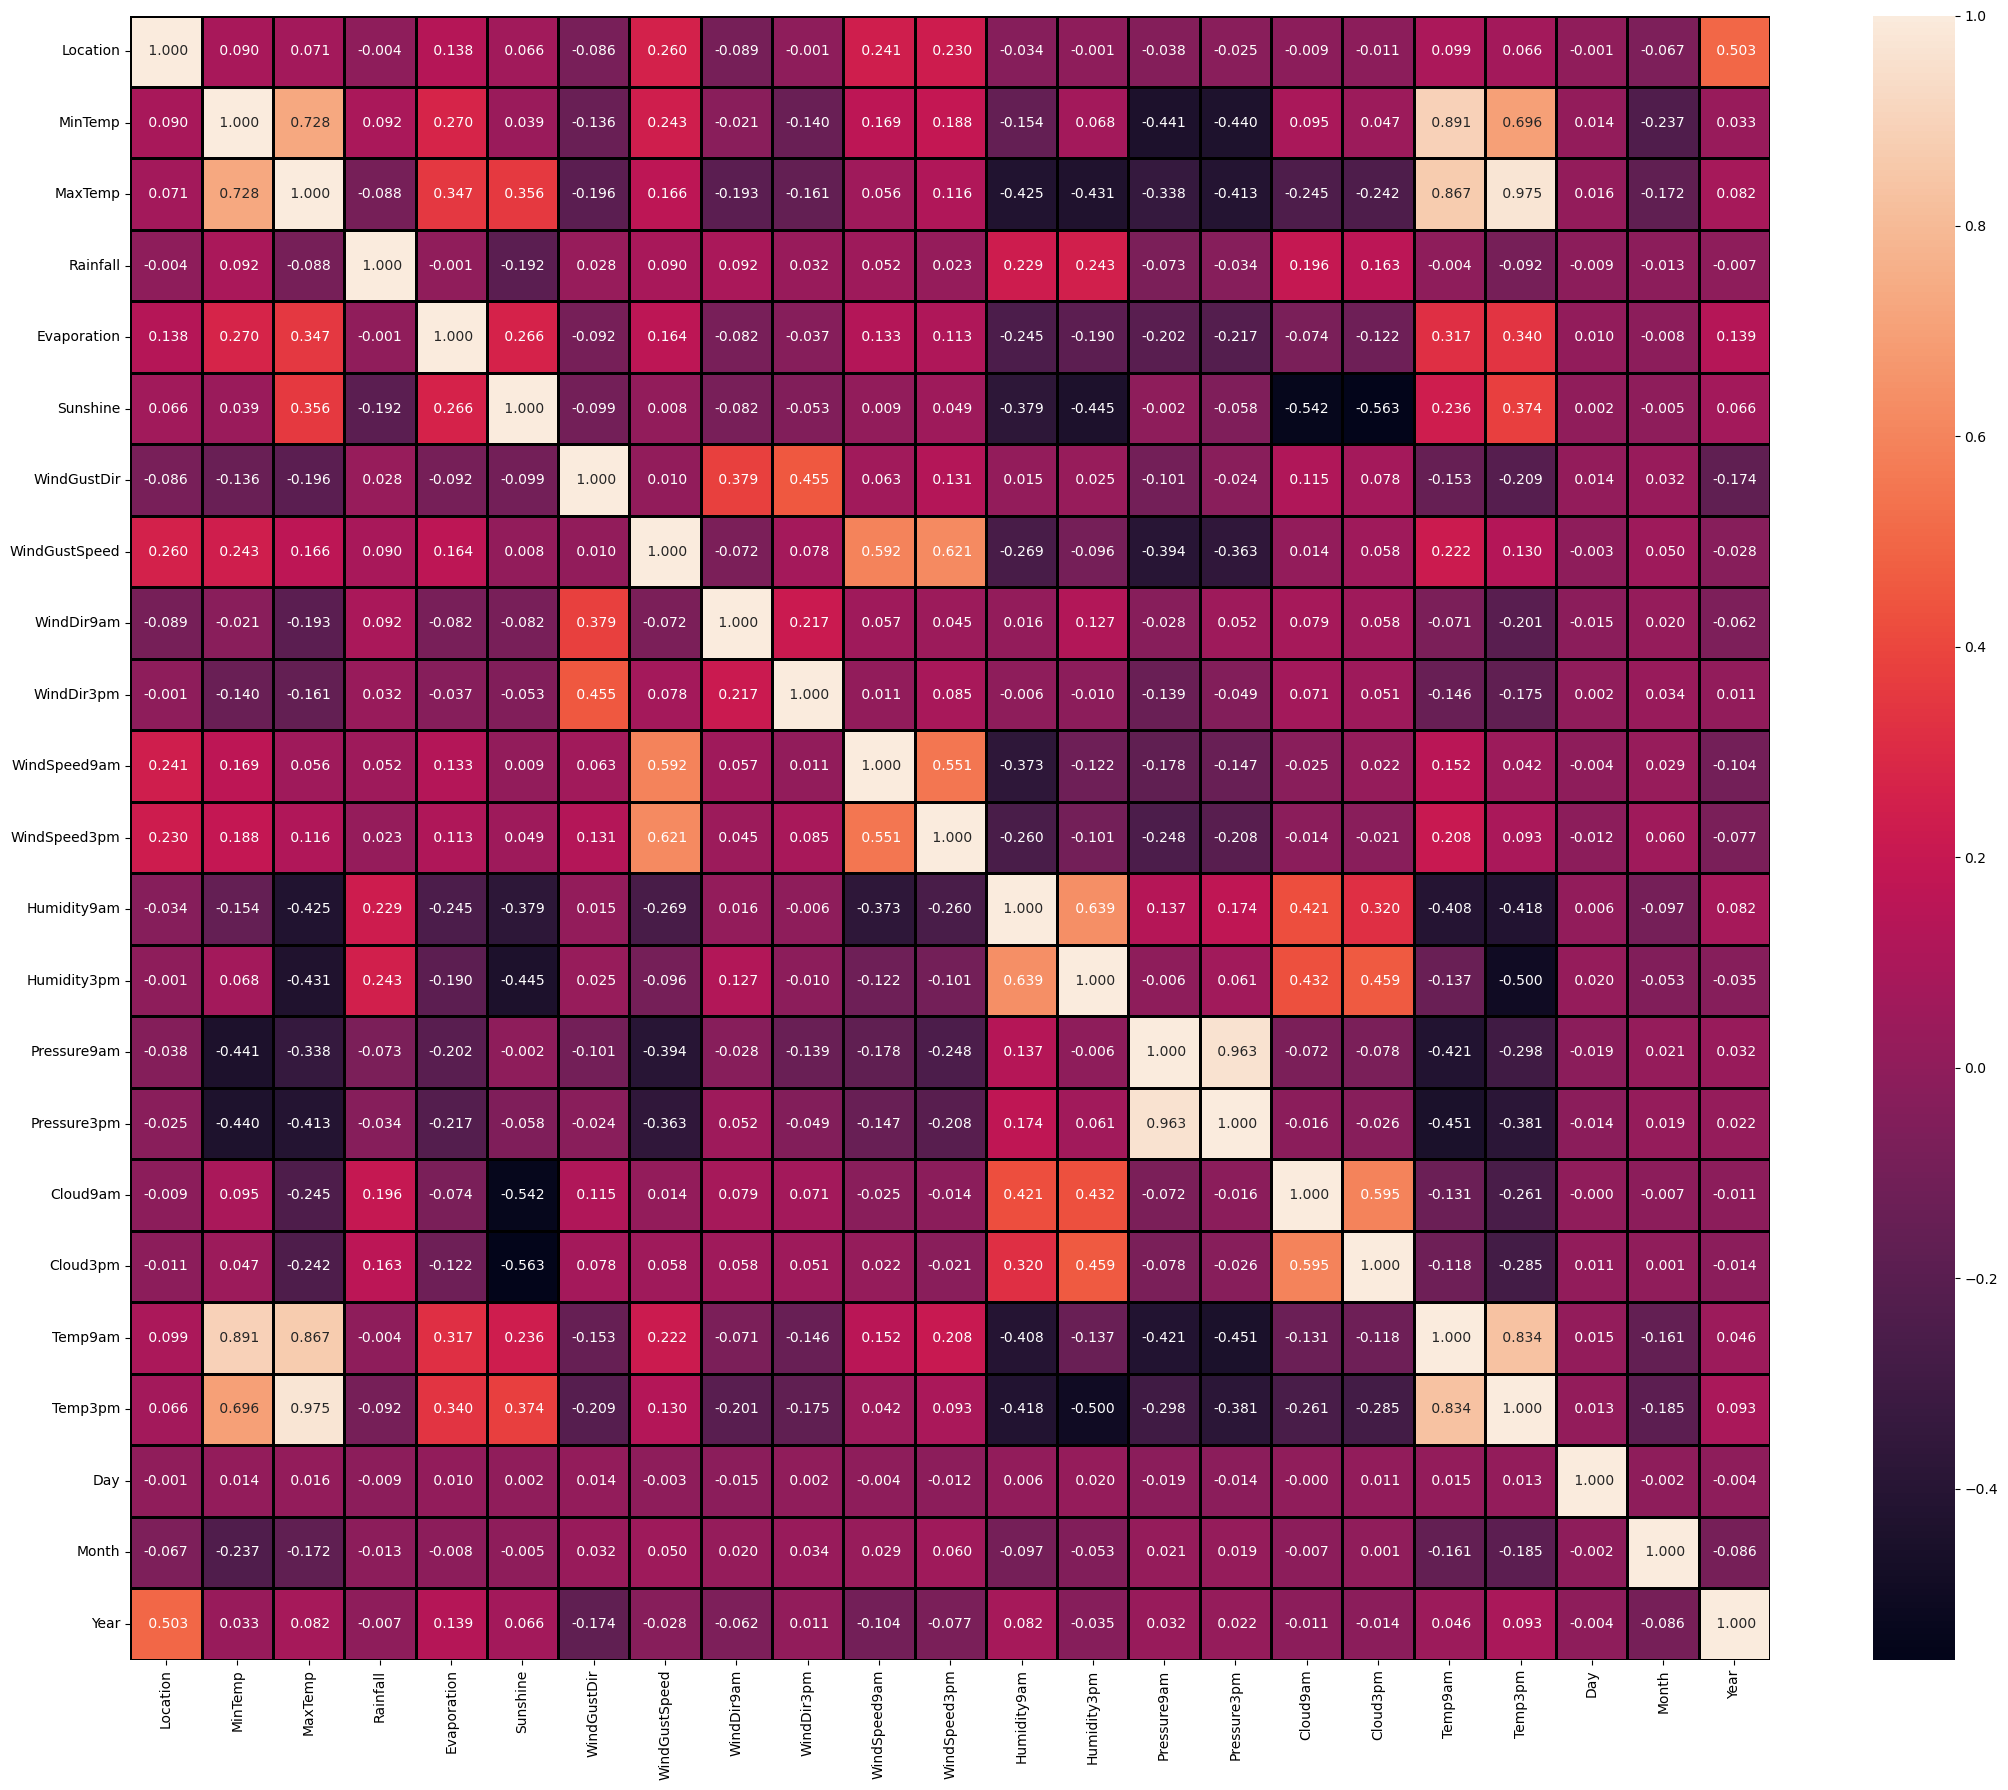

In [85]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .3f' )

#Windspeed & WindGustspeed is highly correlated .
#Temp3pm is correlated to minTemp And MaxTemp.
#Sunshine is Correlated to MaxTemp.
#Cloud is Negativly correlated to Sunshine.
#Humidity and pressure3pm is Negatively Correlated to Temp3pm.

# Outlier Detection

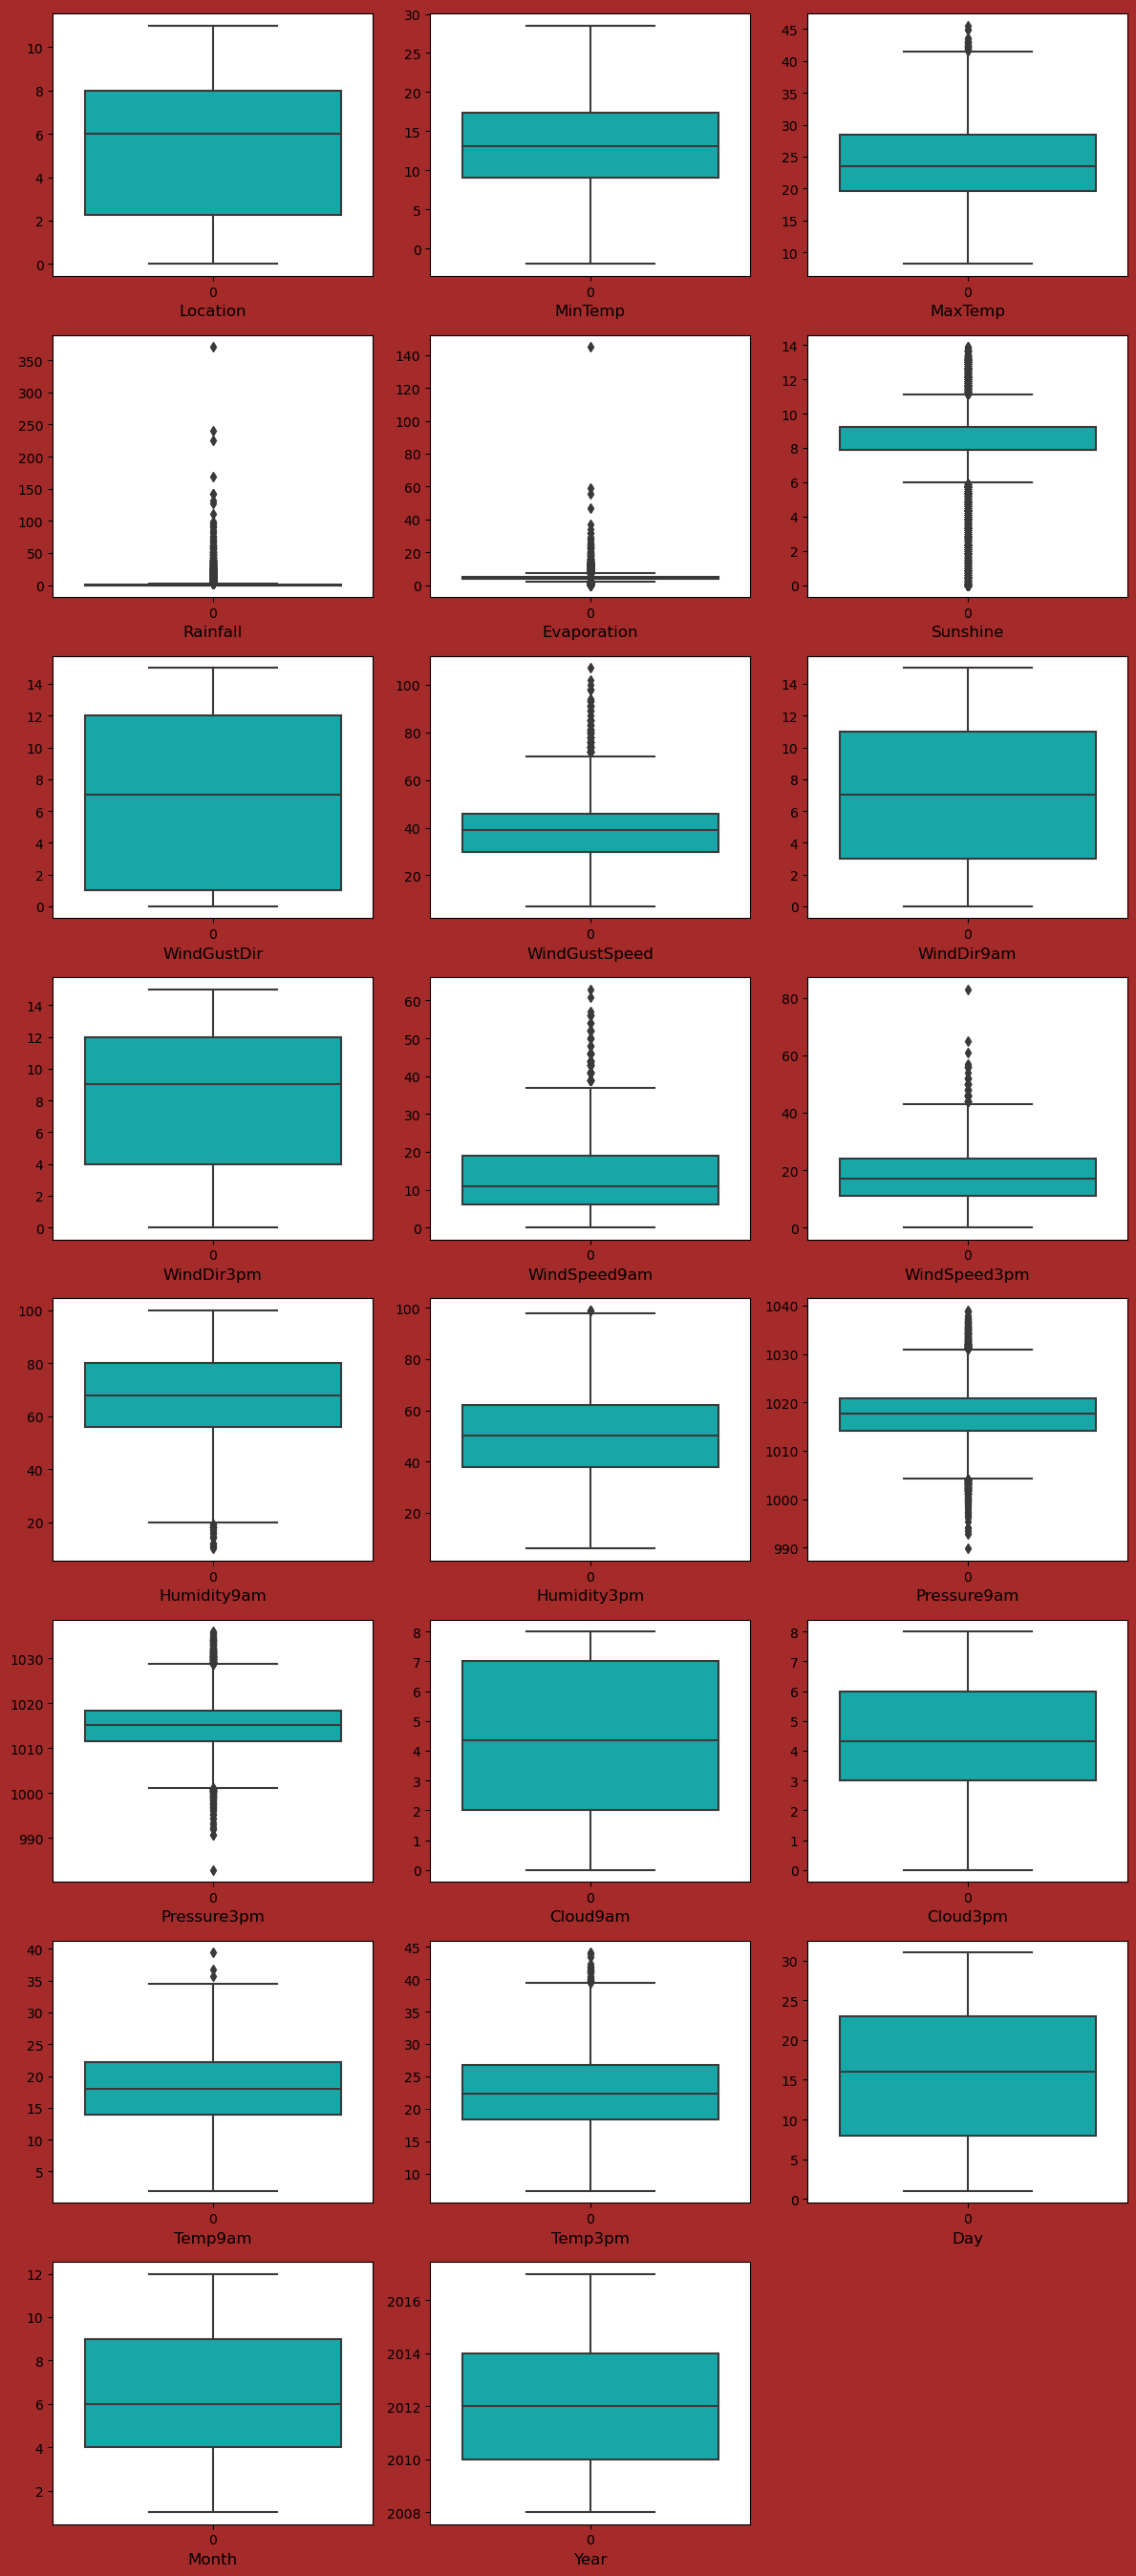

In [86]:
columns=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in columns:
    if index <=25:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

Comment-

We can easily identify Outliers in above map.
These Column contain Outliers.[ 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Outlier Removing


In [87]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm',
                              'Temp9am', 'Temp3pm']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores ( 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# Checking Skewness Of Dataset

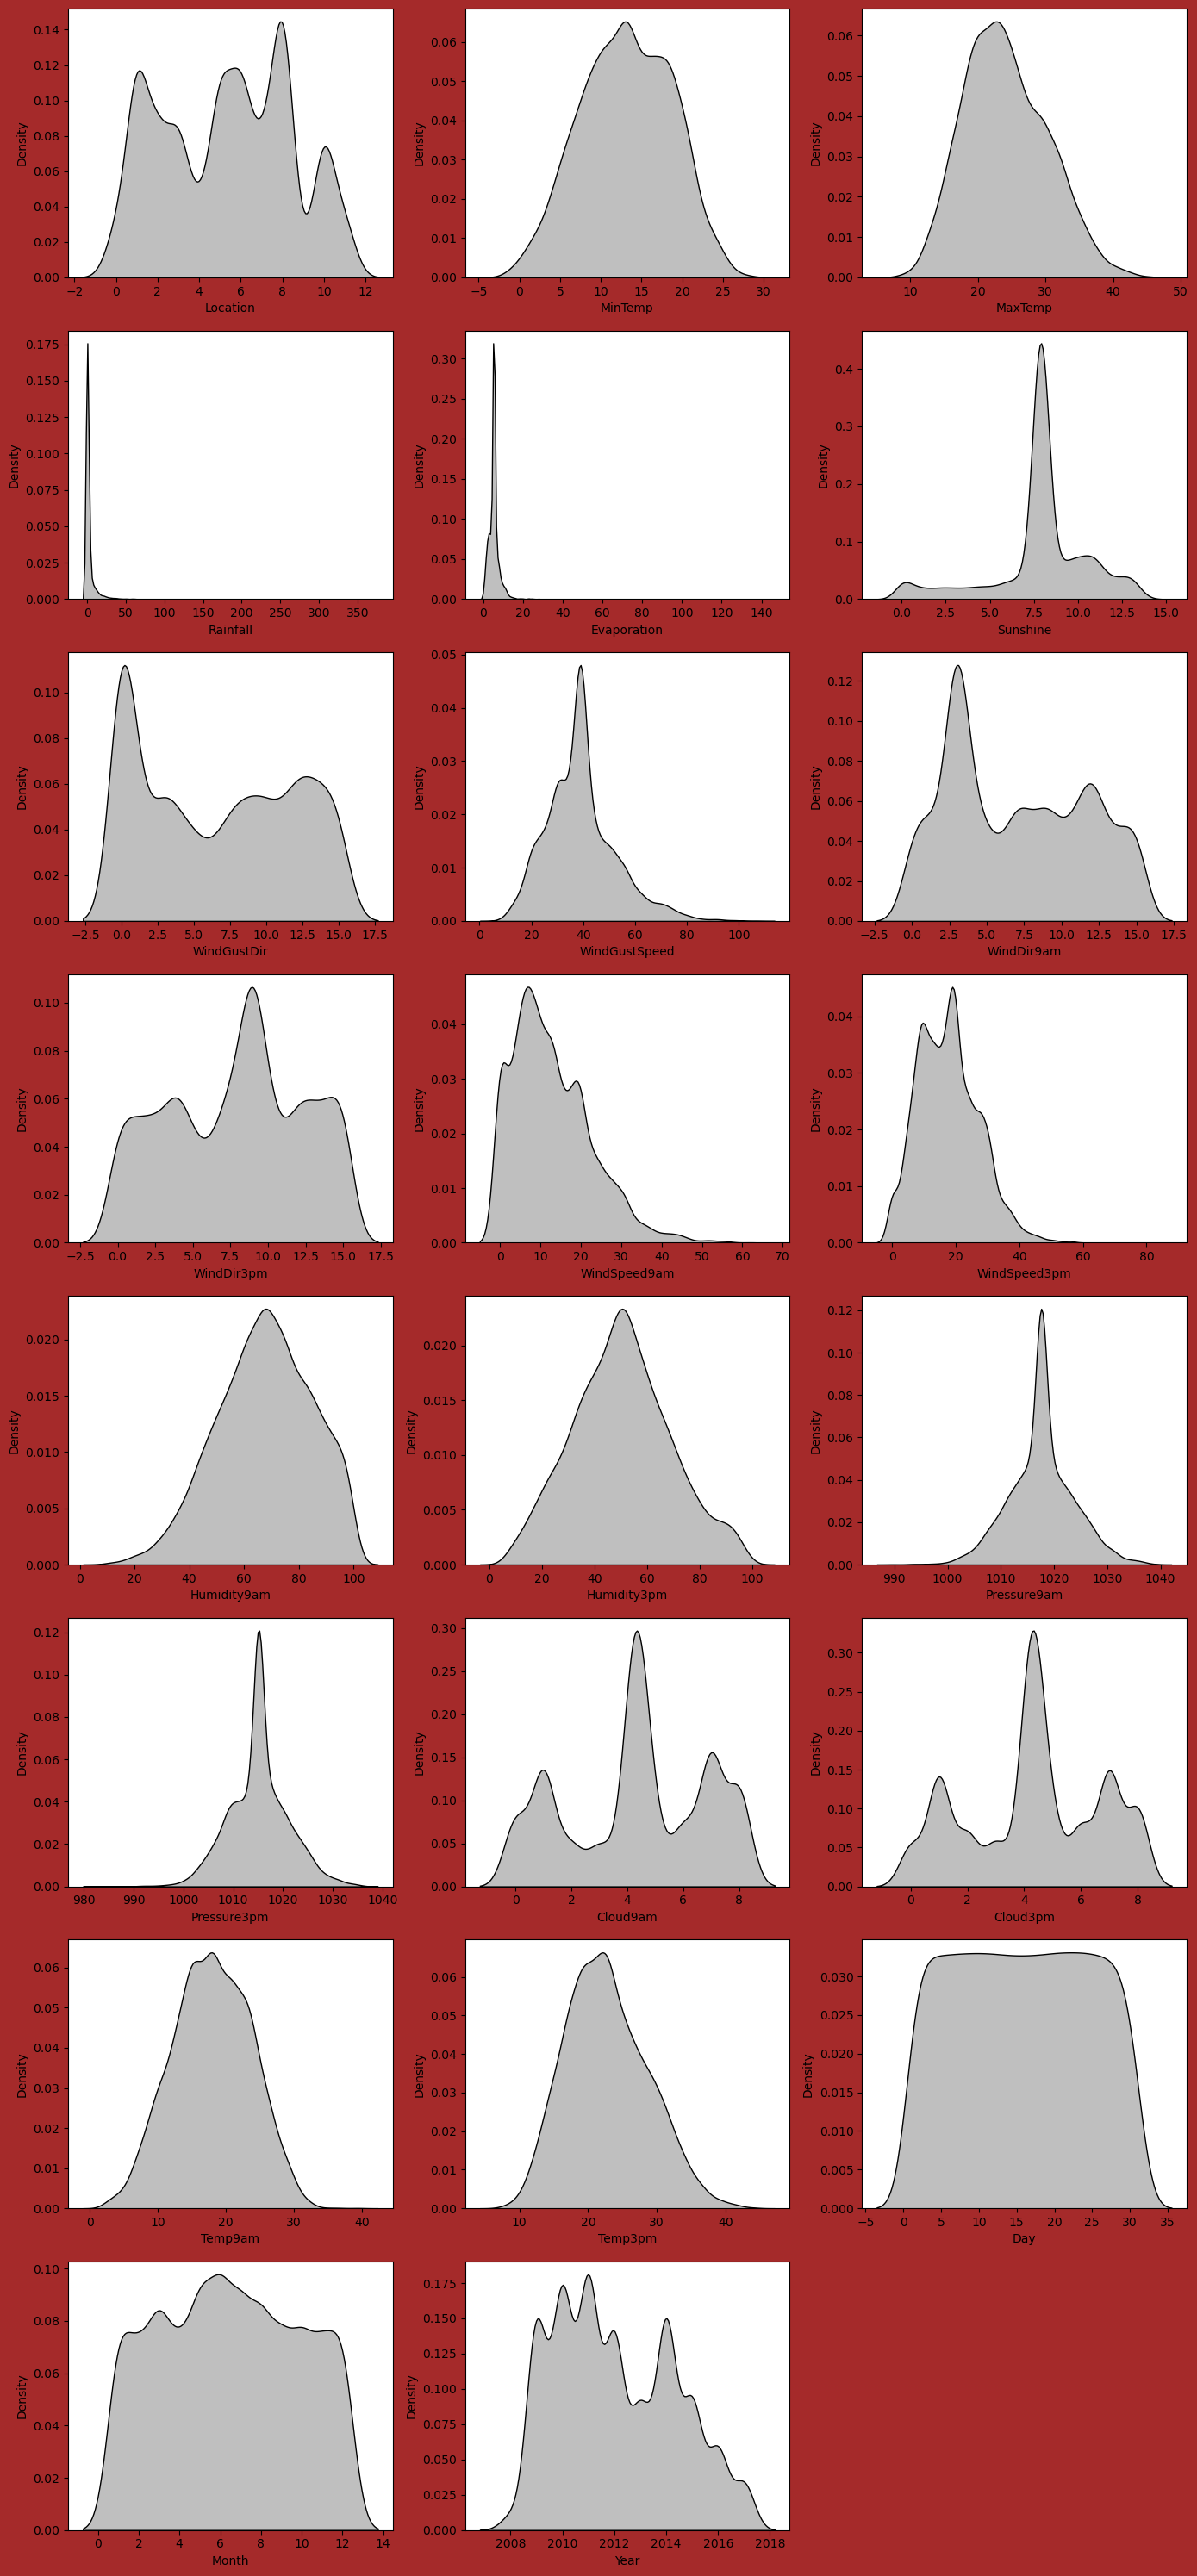

In [88]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in columns:
    if plotnumber <=23:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column], color='k',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [89]:
df.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.549797
Humidity9am      -0.256177
Humidity3pm       0.150860
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64

# Removing Skewness

In [91]:
right_skewed =  ['Rainfall','Evaporation','WindSpeed9am']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed] = scale.fit_transform(df[right_skewed].values)





df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.327598
Rainfall         0.699379
Evaporation      0.337445
Sunshine        -0.882147
WindGustDir      0.105287
WindGustSpeed    0.780437
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am     0.017560
WindSpeed3pm     0.549797
Humidity9am     -0.256177
Humidity3pm      0.150860
Pressure9am      0.022085
Pressure3pm      0.042990
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.047213
Temp3pm          0.348100
Day              0.006240
Month            0.021988
Year             0.354481
dtype: float64

Skewness is Removed.

# Splitting Dataset

In [92]:
feature=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
target1=['RainToday']
target2=['RainTomorrow']
X=df[feature]
Y=df[target1]
y=df[target2]

# Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# variance_inflation_factor

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns


vif

VIF       Features
0    1.631121       Location
1    9.076234        MinTemp
2   26.580795        MaxTemp
3    1.540331       Rainfall
4    1.514031    Evaporation
5    1.975548       Sunshine
6    1.553239    WindGustDir
7    2.253011  WindGustSpeed
8    1.334905     WindDir9am
9    1.423302     WindDir3pm
10   2.060135   WindSpeed9am
11   1.949293   WindSpeed3pm
12   4.220073    Humidity9am
13   5.612423    Humidity3pm
14  20.996068    Pressure9am
15  20.022936    Pressure3pm
16   2.013340       Cloud9am
17   1.910177       Cloud3pm
18  17.906295        Temp9am
19  32.808299        Temp3pm
20   1.004176            Day
21   1.150332          Month
22   1.571352           Year

# Machine learning Model [RainToday]

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [96]:
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.2)
    


In [97]:
X_train.shape

(5409, 23)

# LogisticRegression

In [98]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 98.00443458980045 on Random_state 147


In [99]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, Y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, Y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, Y_pred))

Accuracy Score of Logistics Regression : 0.9719142645971914


Confusion matrix of Logistics Regression : 
 [[993  32]
 [  6 322]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.91      0.98      0.94       328

    accuracy                           0.97      1353
   macro avg       0.95      0.98      0.96      1353
weighted avg       0.97      0.97      0.97      1353



# Model Classification

In [100]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [101]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, Y_pred))
    print('\n')
    
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.9541759053954176


Confusion matrix : 
 [[967  58]
 [  4 324]]


Classification Report : 
               precision    recall  f1-score   support

          No       1.00      0.94      0.97      1025
         Yes       0.85      0.99      0.91       328

    accuracy                           0.95      1353
   macro avg       0.92      0.97      0.94      1353
weighted avg       0.96      0.95      0.96      1353



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.9689578713968958


Confusion matrix : 
 [[994  31]
 [ 11 317]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.91      0.97      0.94       328

    accuracy                           0.97      1353
   macro avg       0.95      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353




# Hyperparameter Tuning

In [102]:
from sklearn.model_selection import GridSearchCV


parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}


grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.882 total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.884 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.892 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.897 total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.879 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.872 total time=   0.6s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [103]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Final Model for [RainToday]

In [104]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)
model.fit(X_train,Y_train)
pred = model.predict(X_test)




print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(Y_test, pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.9578713968957872


Confusion matrix ofRandomForestClassifier : 
 [[1014   11]
 [  46  282]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

          No       0.96      0.99      0.97      1025
         Yes       0.96      0.86      0.91       328

    accuracy                           0.96      1353
   macro avg       0.96      0.92      0.94      1353
weighted avg       0.96      0.96      0.96      1353



In [105]:
Y_test

RainToday
6781        No
7587        No
3524        No
110         No
3084       Yes
...        ...
757         No
5257        No
8093        No
3282        No
2939        No

[1353 rows x 1 columns]

# Machine learning Model [RainTomorrow]

In [107]:
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=i, test_size=.2)
    
X_train.shape

(5409, 23)

# LogisticRegression

In [108]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 86.1049519586105 on Random_state 206


In [109]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.8418329637841833


Confusion matrix of Logistics Regression : 
 [[965  67]
 [147 174]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.87      0.94      0.90      1032
         Yes       0.72      0.54      0.62       321

    accuracy                           0.84      1353
   macro avg       0.79      0.74      0.76      1353
weighted avg       0.83      0.84      0.83      1353



# Model Classification

In [110]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [111]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.8588322246858833


Confusion matrix : 
 [[983  49]
 [142 179]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.95      0.91      1032
         Yes       0.79      0.56      0.65       321

    accuracy                           0.86      1353
   macro avg       0.83      0.76      0.78      1353
weighted avg       0.85      0.86      0.85      1353



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.7982261640798226


Confusion matrix : 
 [[852 180]
 [ 93 228]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.90      0.83      0.86      1032
         Yes       0.56      0.71      0.63       321

    accuracy                           0.80      1353
   macro avg       0.73      0.77      0.74      1353
weighted avg       0.82      0.80      0.81      1353




# Hyperparameter Tuning

In [112]:
from sklearn.model_selection import GridSearchCV


parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}



grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.791 total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.2s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.805 total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.802 total time=   0.2s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.793 total time=   0.2s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.797 total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.797 total time=   0.6s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [113]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}


# Final Model for [RainTomorrow]

In [114]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [115]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8263118994826312


Confusion matrix ofRandomForestClassifier : 
 [[1008   24]
 [ 211  110]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

          No       0.83      0.98      0.90      1032
         Yes       0.82      0.34      0.48       321

    accuracy                           0.83      1353
   macro avg       0.82      0.66      0.69      1353
weighted avg       0.83      0.83      0.80      1353



In [116]:
y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

# Create the DataFrame
prediction = pd.DataFrame({'predicted values': y_pred, 'actual values': y_test})
prediction

predicted values actual values
6781               No           Yes
7587              Yes           Yes
3524               No            No
110                No            No
3084              Yes           Yes
...               ...           ...
757                No            No
5257               No            No
8093               No            No
3282               No            No
2939               No            No

[1353 rows x 2 columns]

# Best Model Saving

In [117]:
import joblib
joblib.dump(model,'Rainfall_Weather_Forecasting.pkl')

['Rainfall_Weather_Forecasting.pkl']

Thanks.................

# Insurance Claim Fraud Detection

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Insurance%20Claim%20Fraud%20Detection/Automobile_insurance_fraud.csv")
df.head()

328  48  521585  17-10-2014  OH   250/500  1000  1406.91        0  466132  \
0  228  42  342868  27-06-2006  IN   250/500  2000  1197.22  5000000  468176   
1  134  29  687698  06-09-2000  OH   100/300  2000  1413.14  5000000  430632   
2  256  41  227811  25-05-1990  IL   250/500  2000  1415.74  6000000  608117   
3  228  44  367455  06-06-2014  IL  500/1000  1000  1583.91  6000000  610706   
4  256  39  104594  12-10-2006  OH   250/500  1000  1351.10        0  478456   

   ...  2 YES.1  71610  6510 13020  52080       Saab    92x  2004  Y  
0  ...  0     ?   5070   780   780   3510   Mercedes   E400  2007  Y  
1  ...  3    NO  34650  7700  3850  23100      Dodge    RAM  2007  N  
2  ...  2    NO  63400  6340  6340  50720  Chevrolet  Tahoe  2014  Y  
3  ...  1    NO   6500  1300   650   4550     Accura    RSX  2009  N  
4  ...  2    NO  64100  6410  6410  51280       Saab     95  2003  Y  

[5 rows x 39 columns]

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   328                       999 non-null    int64  
 1   48                        999 non-null    int64  
 2   521585                    999 non-null    int64  
 3   17-10-2014                999 non-null    object 
 4   OH                        999 non-null    object 
 5   250/500                   999 non-null    object 
 6   1000                      999 non-null    int64  
 7   1406.91                   999 non-null    float64
 8   0                         999 non-null    int64  
 9   466132                    999 non-null    int64  
 10  MALE                      999 non-null    object 
 11  MD                        999 non-null    object 
 12  craft-repair              999 non-null    object 
 13  sleeping                  999 non-null    object 
 14  husband   

In [120]:
print('Number of Rows :',df.shape[0])
print('Number of Columns :',df.shape[1])

Number of Rows : 999
Number of Columns : 39


# Checking Nulls

In [124]:
df.isin(['?']).sum().any()

True

328                           0
48                            0
521585                        0
17-10-2014                    0
OH                            0
250/500                       0
1000                          0
1406.91                       0
0                             0
466132                        0
MALE                          0
MD                            0
craft-repair                  0
sleeping                      0
husband                       0
53300                         0
0.1                           0
25-01-2015                    0
Single Vehicle Collision      0
Side Collision              178
Major Damage                  0
Police                        0
SC                            0
Columbus                      0
9935 4th Drive                0
5                             0
1                             0
YES                         360
1.1                           0
2                             0
YES.1                       343
71610   

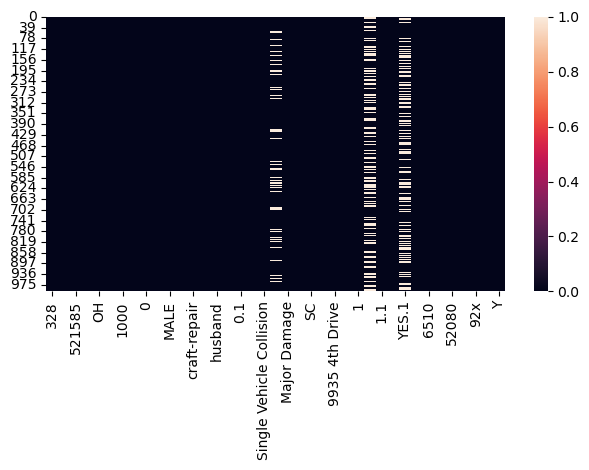

In [125]:
df.replace('?',np.nan,inplace=True)
sns.heatmap(df.isna())
df.isna().sum()

# Exploratory Data Analysis
Univariate Analysis

In [130]:
plt.figure(figsize=(4,4))
sns.histplot(df['fraud_reported'],color='g')
plt.title('Fraud Reported')
plt.show()

KeyError: 'fraud_reported'

<Figure size 400x400 with 0 Axes>

In [131]:
plt.figure(figsize=(4,4))
sns.barplot(df['auto_year'],color='r')
plt.show()

KeyError: 'auto_year'

<Figure size 400x400 with 0 Axes>

In [132]:
df.describe().T

count          mean           std         min         25%        50%  \
328      999.0  2.038298e+02  1.151038e+02        0.00     115.500     199.00   
48       999.0  3.893894e+01  9.140370e+00       19.00      32.000      38.00   
521585   999.0  5.462633e+05  2.571906e+05   100804.00  335913.500  533940.00   
1000     999.0  1.136136e+03  6.121560e+02      500.00     500.000    1000.00   
1406.91  999.0  1.256255e+03  2.442432e+02      433.33    1089.185    1257.04   
0        999.0  1.102102e+06  2.298293e+06 -1000000.00       0.000       0.00   
466132   999.0  5.012496e+05  7.172892e+04   430104.00  448373.000  466498.00   
53300    999.0  2.509790e+04  2.787187e+04        0.00       0.000       0.00   
0.1      999.0 -2.682052e+04  2.810537e+04  -111100.00  -51500.000  -24100.00   
5        999.0  1.165065e+01  6.951671e+00        0.00       6.000      12.00   
1        999.0  1.839840e+00  1.019044e+00        1.00       1.000       1.00   
1.1      999.0  9.919920e-01  8.205379e-01        0.00       0.000       1.00   
2        999.0  1.486486e+00  1.111773e+00        0.00       1.000       1.00   
71610    999.0  5.274307e+04  2.640801e+04      100.00   41775.000   57970.00   
6510     999.0  7.434344e+03  4.883309e+03        0.00    4290.000    6780.00   
13020    999.0  7.393944e+03  4.823860e+03        0.00    4440.000    6750.00   
52080    999.0  3.791478e+04  1.889040e+04       70.00   30275.000   42080.00   
2004     999.0  2.005104e+03  6.018773e+00     1995.00    2000.000    2005.00   

               75%          max  
328         276.00       479.00  
48           44.00        64.00  
521585   759459.50    999435.00  
1000       2000.00      2000.00  
1406.91    1415.71      2047.59  
0             0.00  10000000.00  
466132   603254.00    620962.00  
53300     51000.00    100500.00  
0.1           0.00         0.00  
5            17.00        23.00  
1             3.00         4.00  
1.1           2.00         2.00  
2             2.00         3.00  
71610     70550.00    114920.00  
6510      11310.00     21450.00  
13020     10870.00     23670.00  
52080     50775.00     79560.00  
2004       2010.00      2015.00

<Axes: >

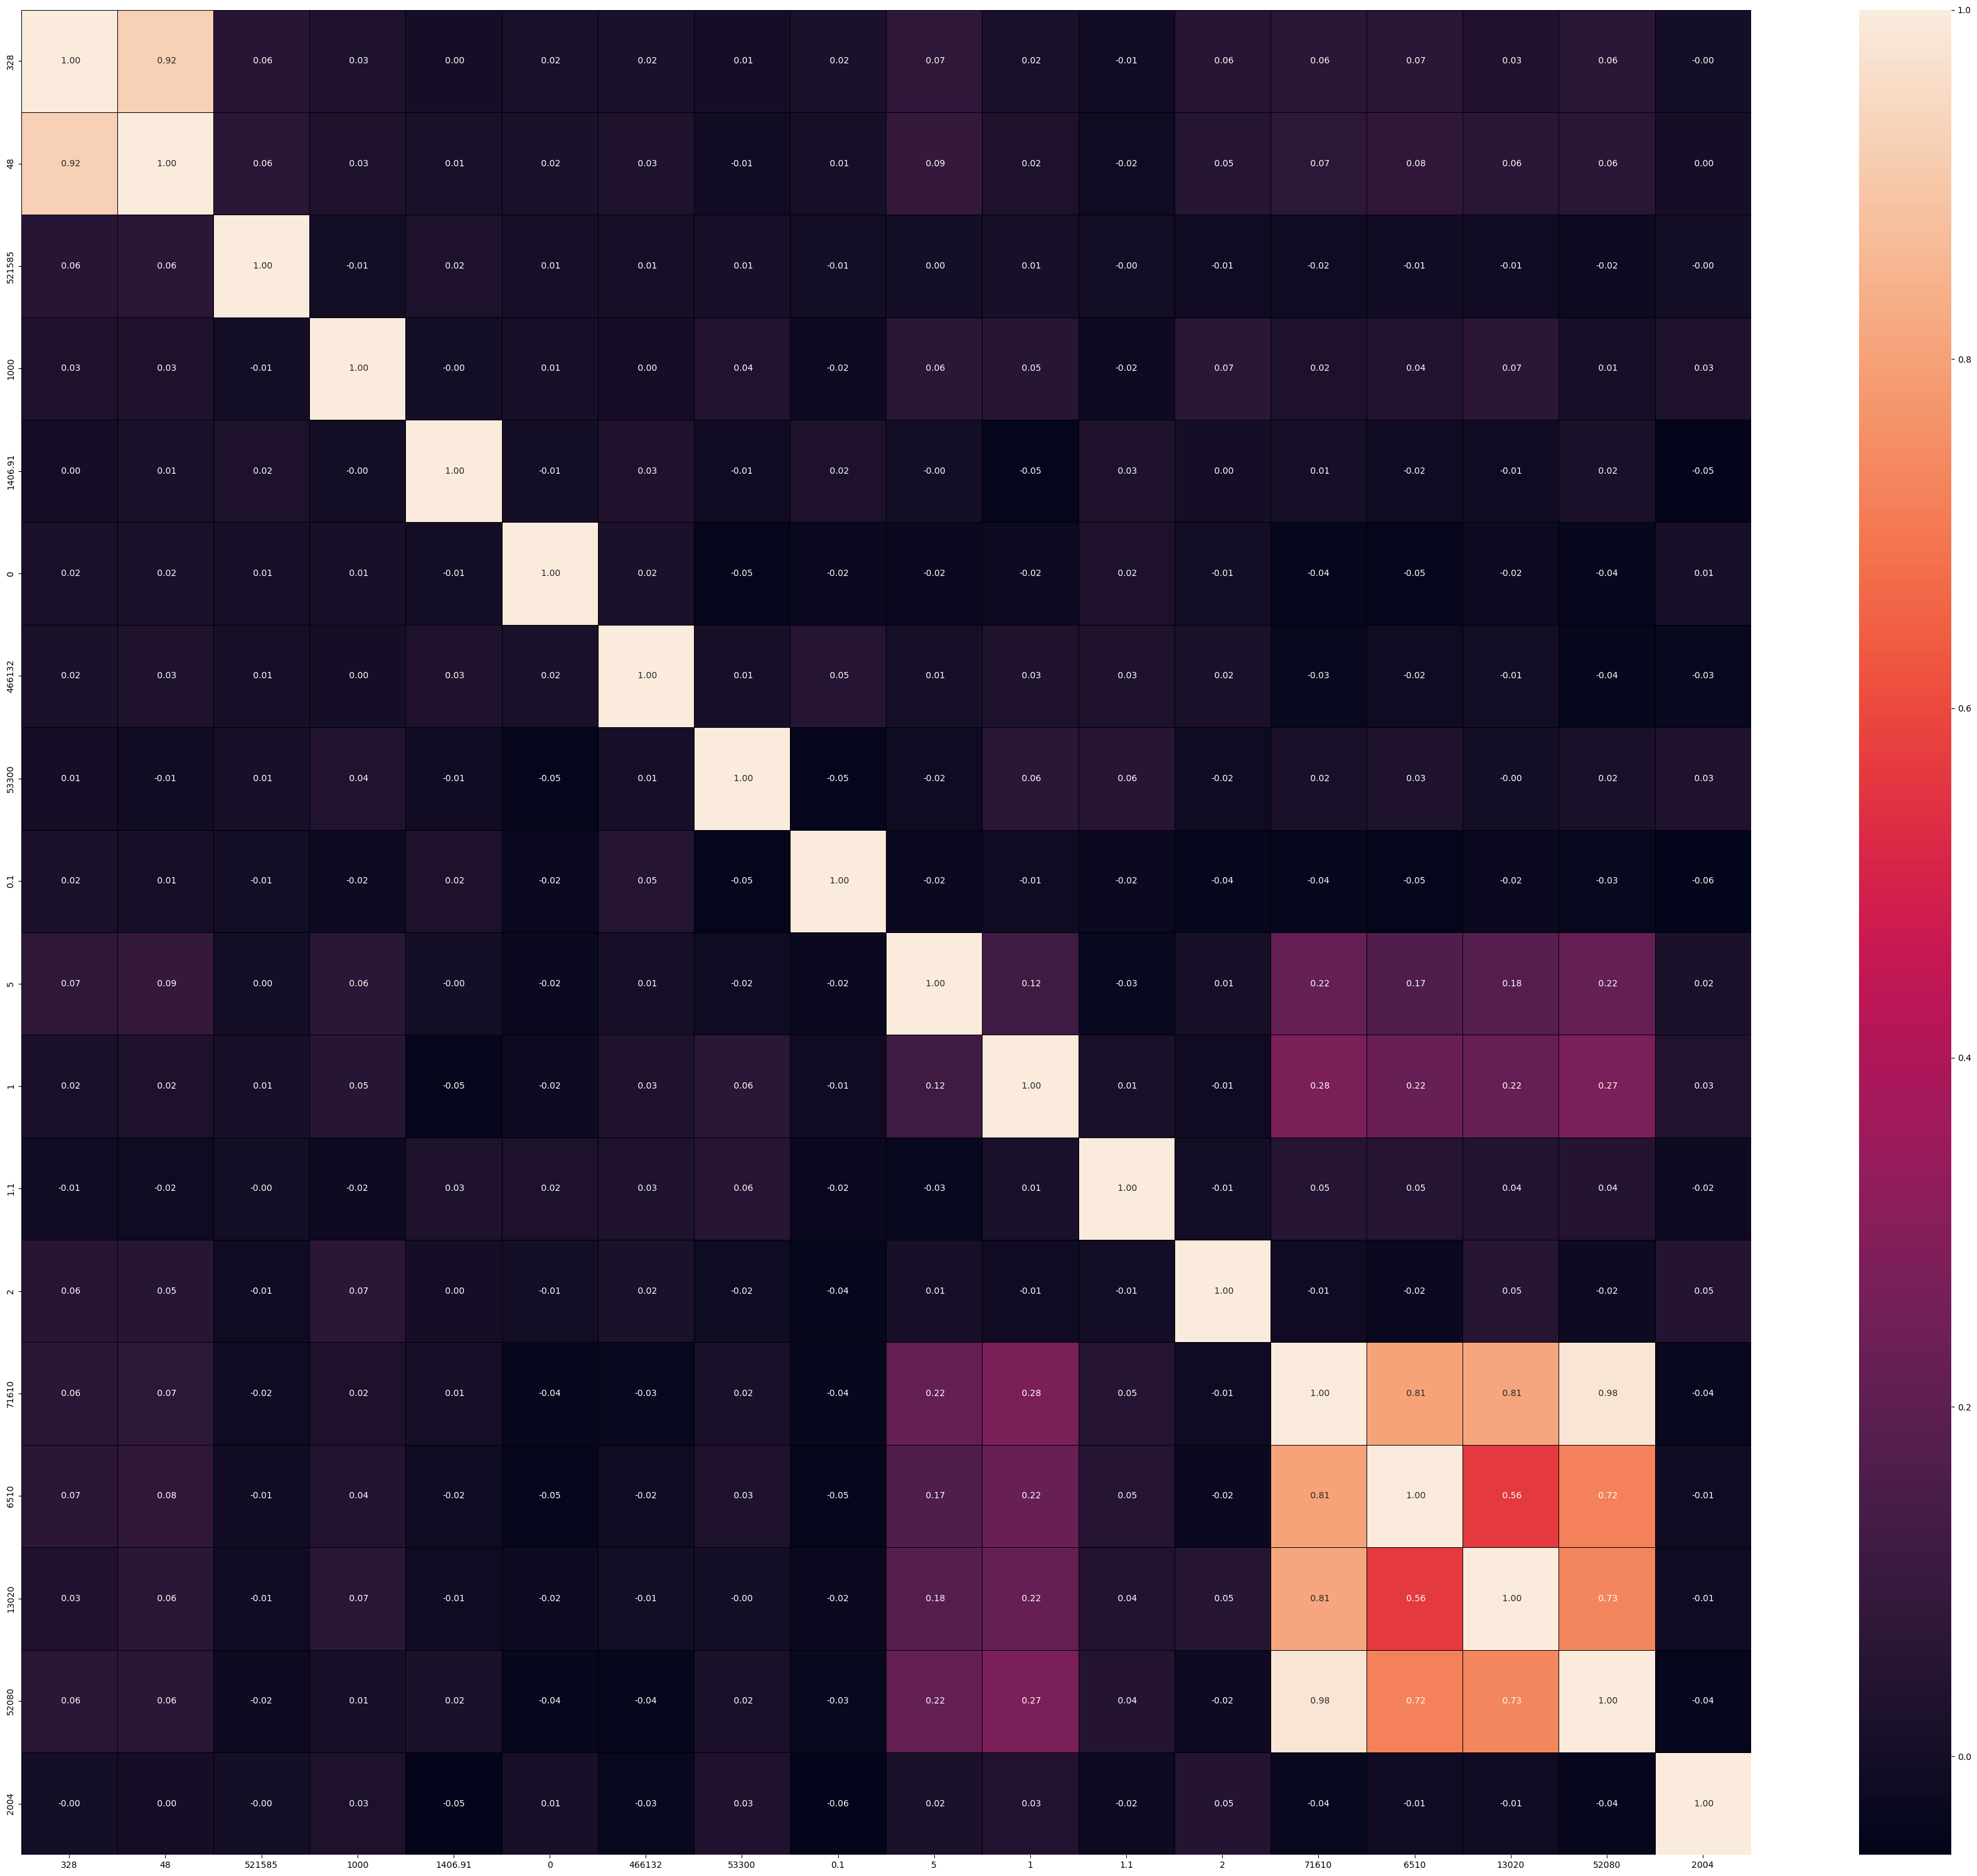

In [133]:
plt.figure(figsize=(35,30))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,linecolor='black',fmt=' .2f' )

KeyError: 'months_as_customer'

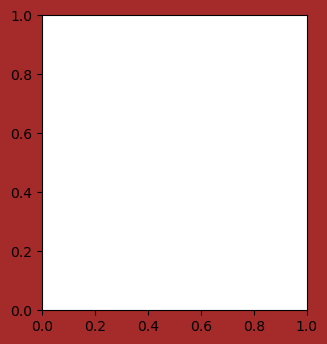

In [134]:
columns=['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_location',
       'property_damage', 'bodily_injuries', 
       'incident_hour_of_the_day','witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'policy_year']
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in columns:
    if index <=36:
        ax = plt.subplot(9,4,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

KeyError: 'months_as_customer'

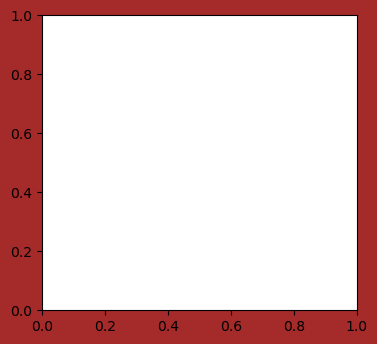

In [135]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in columns:
    if plotnumber <=36:
        ax = plt.subplot(9,4,plotnumber)
        sns.distplot(df[column], color='k',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()


In [136]:
df.skew()

328        0.364615
48         0.481461
521585     0.038684
1000       0.477027
1406.91    0.006022
0          1.805104
466132     0.815086
53300      0.481352
0.1       -0.389813
5         -0.037615
1          0.501009
1.1        0.014799
2          0.020923
71610     -0.592958
6510       0.264131
13020      0.380670
52080     -0.619480
2004      -0.048812
dtype: float64

In [137]:
right_skewed = ['umbrella_limit' , 'insured_zip','property_damage','police_report_available' ] 

df[right_skewed] = np.log1p(df[right_skewed]+1)

sns.histplot(df[right_skewed], kde=True)
plt.title('Log-Transformed Data Distribution')
plt.show()

KeyError: "None of [Index(['umbrella_limit', 'insured_zip', 'property_damage',\n       'police_report_available'],\n      dtype='object')] are in the [columns]"

In [138]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

ValueError: Found input variables with inconsistent numbers of samples: [32536, 6762]

In [139]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
maxAccu1=0
maxRS1=0
for i in range(1,200):
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=i, test_size=.2)
    dtc.fit(X_train,y_train)
    y_pred1=dtc.predict(X_test)
    acc1=accuracy_score(y_test,y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS1=i
        
print('Best accuracy Score is: ', (maxAccu1)*100 ,'\nAt Random State: ', maxRS1)

ValueError: Found input variables with inconsistent numbers of samples: [32536, 6762]

# Zomato Restaurant

In [140]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [144]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Country-Code.csv",encoding='latin1')

In [145]:
df.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Country Code  15 non-null     int64 
 1   Country       15 non-null     object
dtypes: int64(1), object(1)
memory usage: 368.0+ bytes


In [147]:
print('Number of Rows :',df.shape[0])
print('Number of Columns :',df.shape[1])


Number of Rows : 15
Number of Columns : 2


In [148]:
df.duplicated().sum()

0

In [149]:
df.isin([' ','NA','-']).sum().any()

False

# Checking Nulls

Country Code    0
Country         0
dtype: int64


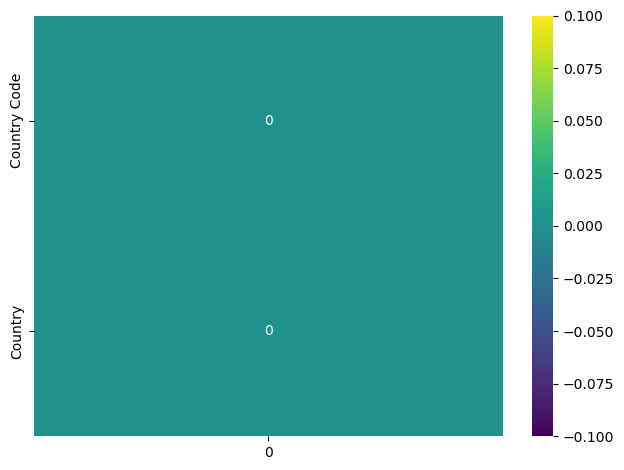

In [150]:
sns.heatmap(df.isna().sum().to_frame(),annot=True,cmap='viridis')
print(df.isnull().sum())

# Exploratory Data Analysis
Univariate Analysis

In [152]:
plt.figure(figsize=(12,8))
sns.histplot(df['City'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

KeyError: 'City'

<Figure size 1200x800 with 0 Axes>

In [153]:
sns.histplot(df['Currency'],kde=True,color='y')
plt.xticks( fontsize=7,rotation=90)
plt.show()

KeyError: 'Currency'

In [154]:
sns.histplot(df['Price range'],kde=True,color='g')
plt.show()

KeyError: 'Price range'

In [155]:
df.describe().T

count        mean        std  min   25%    50%    75%    max
Country Code   15.0  137.933333  80.009345  1.0  65.5  166.0  199.5  216.0

<Axes: >

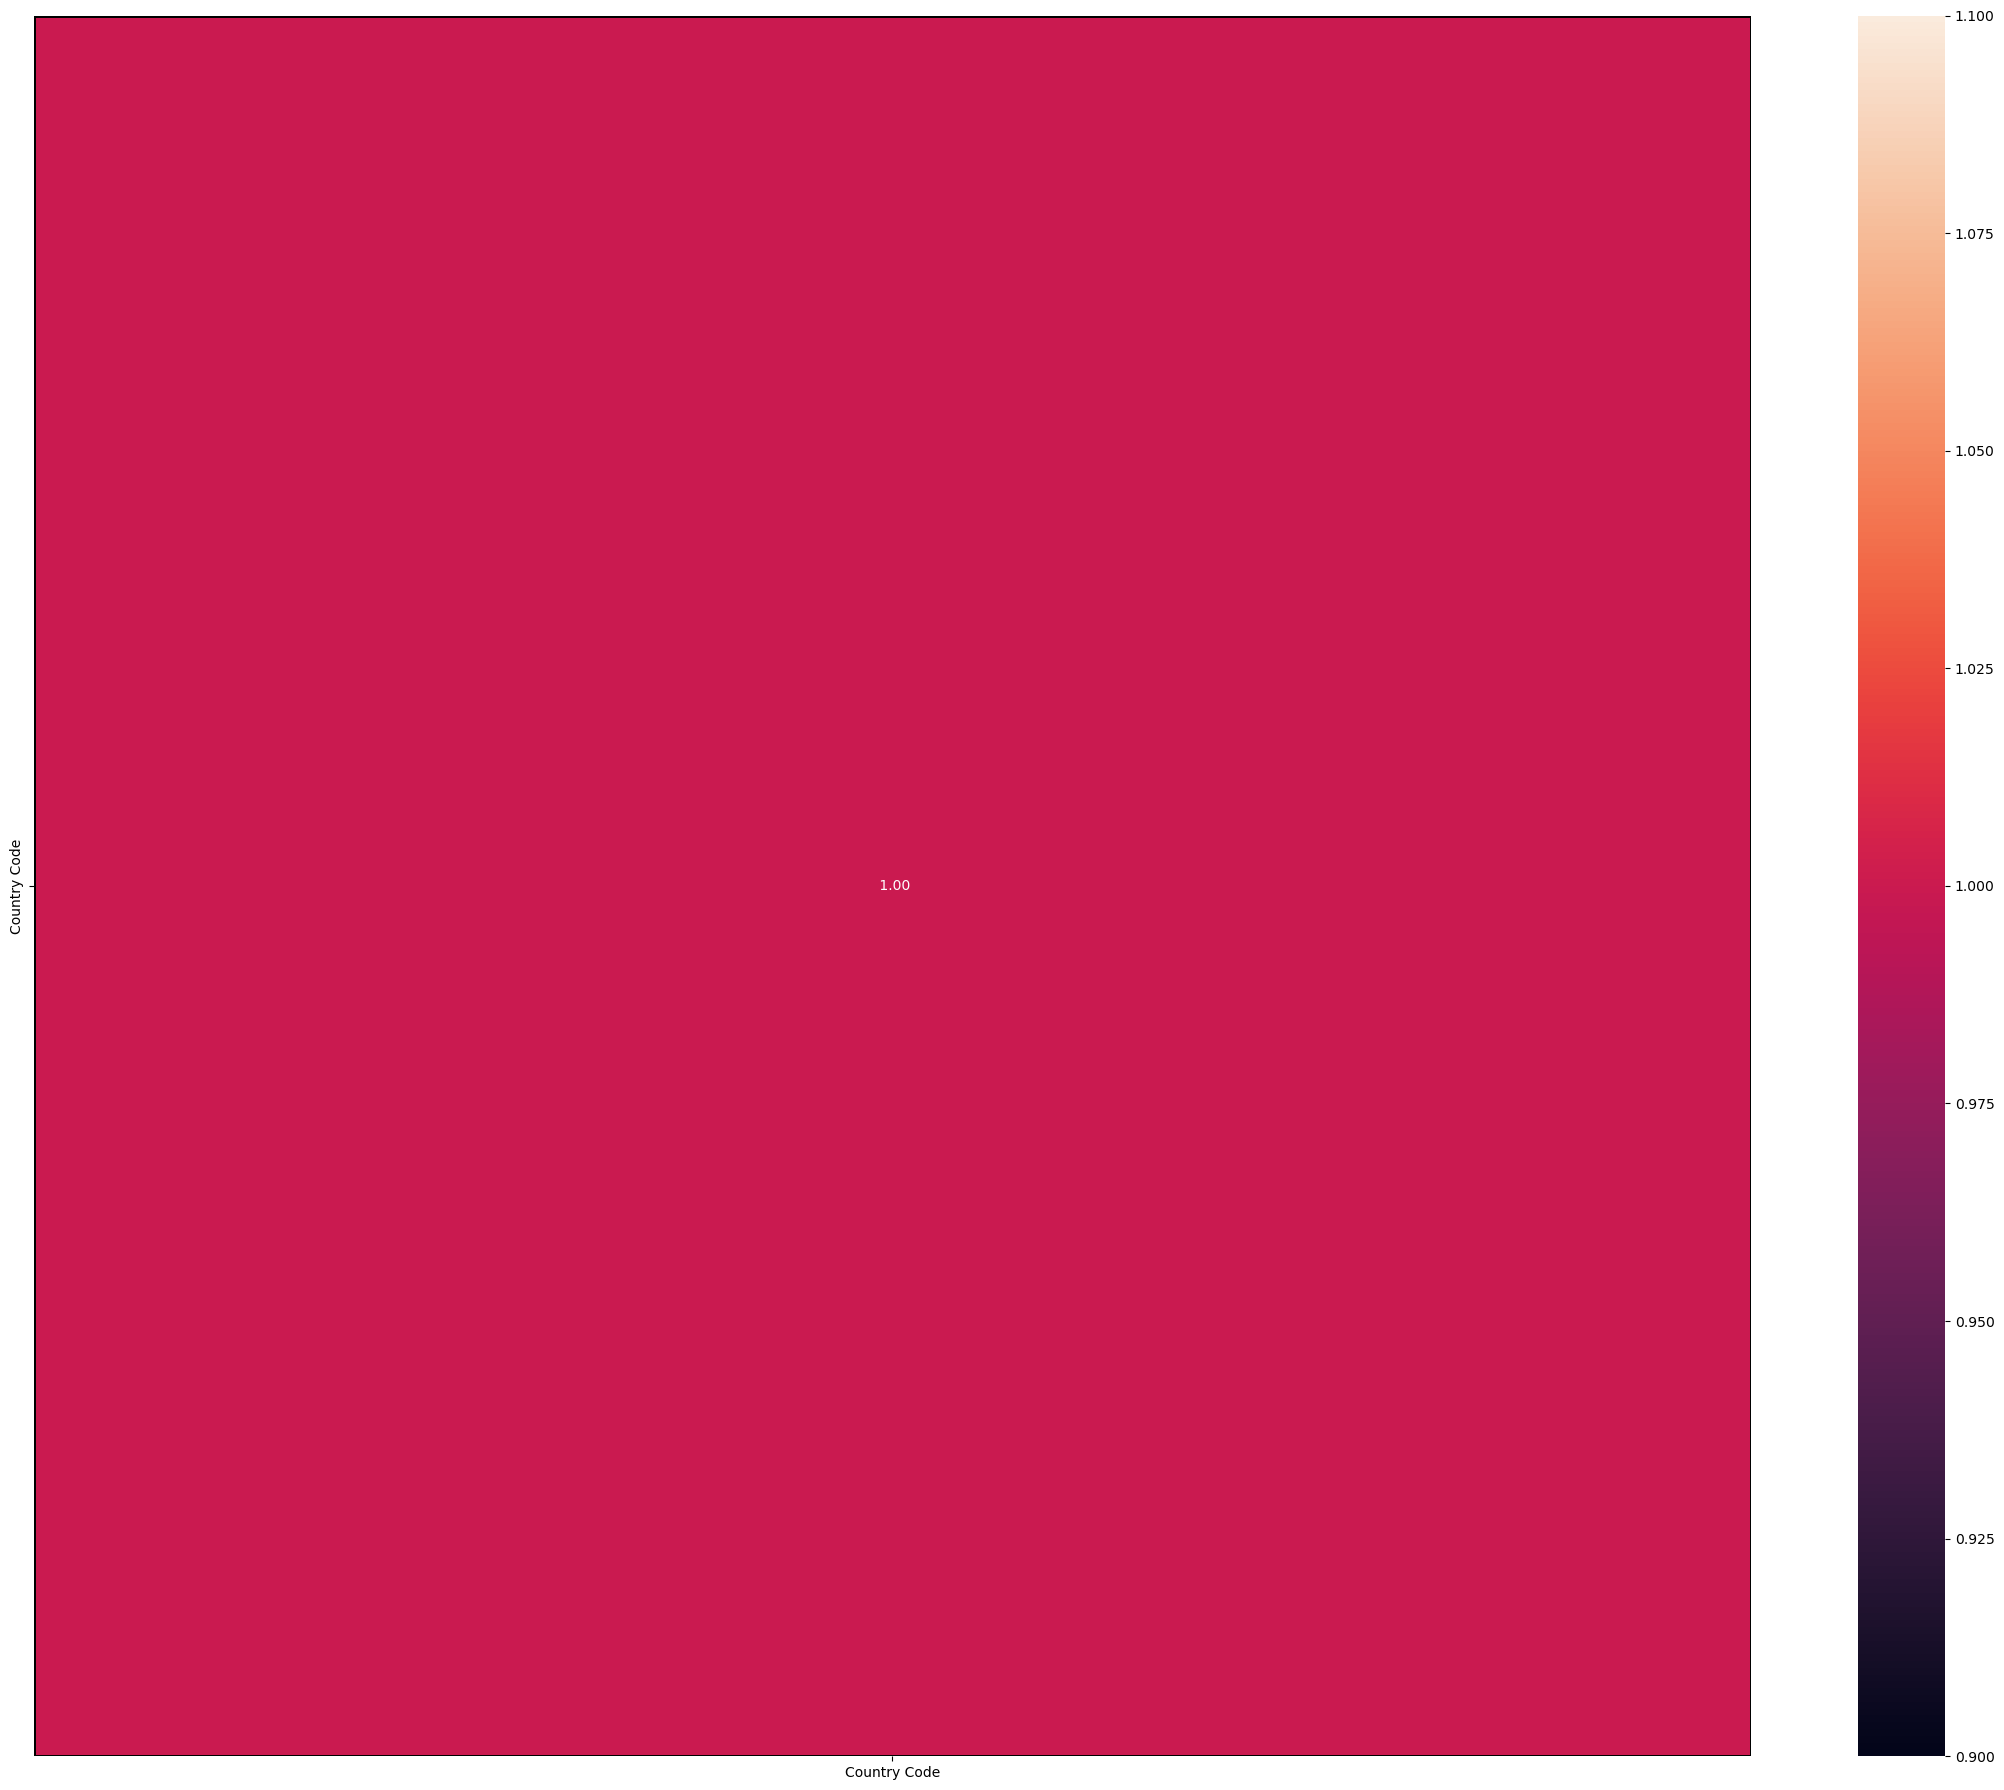

In [156]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .2f' )

In [157]:
plt.figure(figsize=(12,8))
df.corr()['Price range'].sort_values(ascending=False).drop(['Price range']).plot(kind='bar',color='brown')
plt.xlabel('Features',fontsize=10)
plt.ylabel('Price range',fontsize=10)
plt.title('Correlation between Price range and features using bar plot',fontsize=20)
plt.show()

KeyError: 'Price range'

<Figure size 1200x800 with 0 Axes>

ValueError: could not convert string to float: 'India'

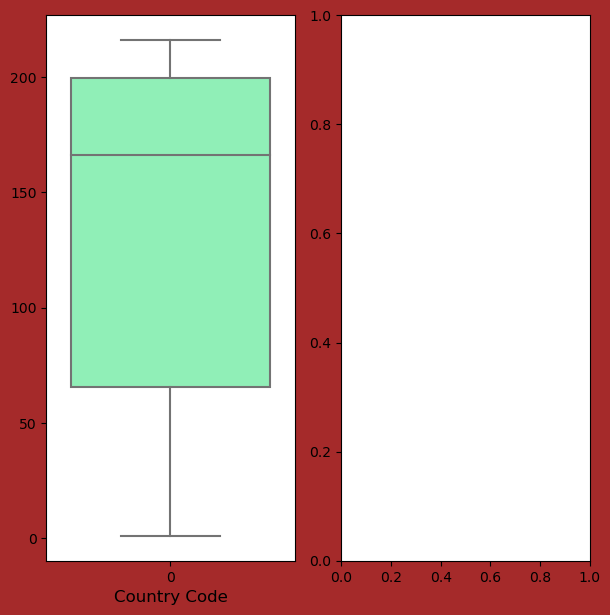

In [158]:
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in df:
    if index <=20:
        ax = plt.subplot(5,4,index)
        sns.boxplot(df[column], palette='rainbow')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

In [159]:
df.skew()

Country Code   -0.757356
dtype: float64

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

VIF       Features
0    1.631121       Location
1    9.076234        MinTemp
2   26.580795        MaxTemp
3    1.540331       Rainfall
4    1.514031    Evaporation
5    1.975548       Sunshine
6    1.553239    WindGustDir
7    2.253011  WindGustSpeed
8    1.334905     WindDir9am
9    1.423302     WindDir3pm
10   2.060135   WindSpeed9am
11   1.949293   WindSpeed3pm
12   4.220073    Humidity9am
13   5.612423    Humidity3pm
14  20.996068    Pressure9am
15  20.022936    Pressure3pm
16   2.013340       Cloud9am
17   1.910177       Cloud3pm
18  17.906295        Temp9am
19  32.808299        Temp3pm
20   1.004176            Day
21   1.150332          Month
22   1.571352           Year

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, r2_score
# Spliting the data for training & testing.
for i in range(0,200):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.3)
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

In [162]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
maxAccu1=0
maxRS1=0
for i in range(0,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    dtr.fit(X_train,Y_train)
    Y_pred1=dtr.predict(X_test)
    acc1=r2_score(Y_test,Y_pred1)
    if acc1>maxAccu1:
        maxAccu1=acc1
        maxRS11=i
print('Best accuracy is', maxAccu1*100 ,'on Random_state', maxRS1)

ValueError: could not convert string to float: 'Yes'

In [163]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)

pred2 = rfr.predict(X_test)

# Evaluate the model using regression metrics
R3 = r2_score(Y_test, pred2)

print("R-squared:", R3*100)

ValueError: could not convert string to float: 'Yes'